## <FONT COLOR="Blue">*Rebecca Leygonie*
    N° étudiant : 19000002

# Rendu TPs dans le cadre du cours *Modèles formels pour le Big Data* 

# <FONT COLOR="Red">TP 1</font> 

## *Exemple statistique descriptive unidimensionelle (partie 2-1)*

Initiation à R (tutoriel: https://github.com/wikistat/Intro-R)
Programmation R:
Refaire l’exemple de statistique descriptive unidimensionnelle (partie 2-1,  )

- Effectifs, effectifs cumulés, fréquences et fréquences cumulées
- Représentations graphiques
- Le diagramme en bâtons + Le diagramme cumulatif
- La médiane (quantile d’ordre 1/2) et les quartiles (quantile d’ordre1/4, 3/4)
- La moyenne
- La dispersion
- La variance et l’écart–type

In [1]:
age=c(43, 29, 57, 45, 50, 29, 37, 59, 46, 31, 46, 24, 33, 38, 49, 31, 62, 60, 52, 38, 38, 26, 41, 52, 60, 49, 52, 41, 38, 26, 37, 59, 57, 41, 29, 33, 33, 43, 46, 57, 46, 33, 46, 49, 57, 57, 46, 43)

In [2]:
df=data.frame(age)

### Effectifs

In [3]:
effectif <-table(df)
effectif

df
24 26 29 31 33 37 38 41 43 45 46 49 50 52 57 59 60 62 
 1  2  3  2  4  2  4  3  3  1  6  3  1  3  5  2  2  1 

### Effectifs cumulés

In [4]:
effectifCumu<-cumsum(table(df))
effectifCumu

24 26 29 31 33 37 38 41 43 45 46 49 50 52 57 59 60 62 
 1  3  6  8 12 14 18 21 24 25 31 34 35 38 43 45 47 48

### Fréquences

In [5]:
fréquence<-effectif/nrow(df)*100
fréquence

df
       24        26        29        31        33        37        38        41 
 2.083333  4.166667  6.250000  4.166667  8.333333  4.166667  8.333333  6.250000 
       43        45        46        49        50        52        57        59 
 6.250000  2.083333 12.500000  6.250000  2.083333  6.250000 10.416667  4.166667 
       60        62 
 4.166667  2.083333 

### Fréquences cumulées

In [6]:
fréquenceCumu=effectifCumu/nrow(df)*100
fréquenceCumu

24         26         29         31         33         37         38 
  2.083333   6.250000  12.500000  16.666667  25.000000  29.166667  37.500000 
        41         43         45         46         49         50         52 
 43.750000  50.000000  52.083333  64.583333  70.833333  72.916667  79.166667 
        57         59         60         62 
 89.583333  93.750000  97.916667 100.000000

## Représentation graphique

### Diagramme en batons

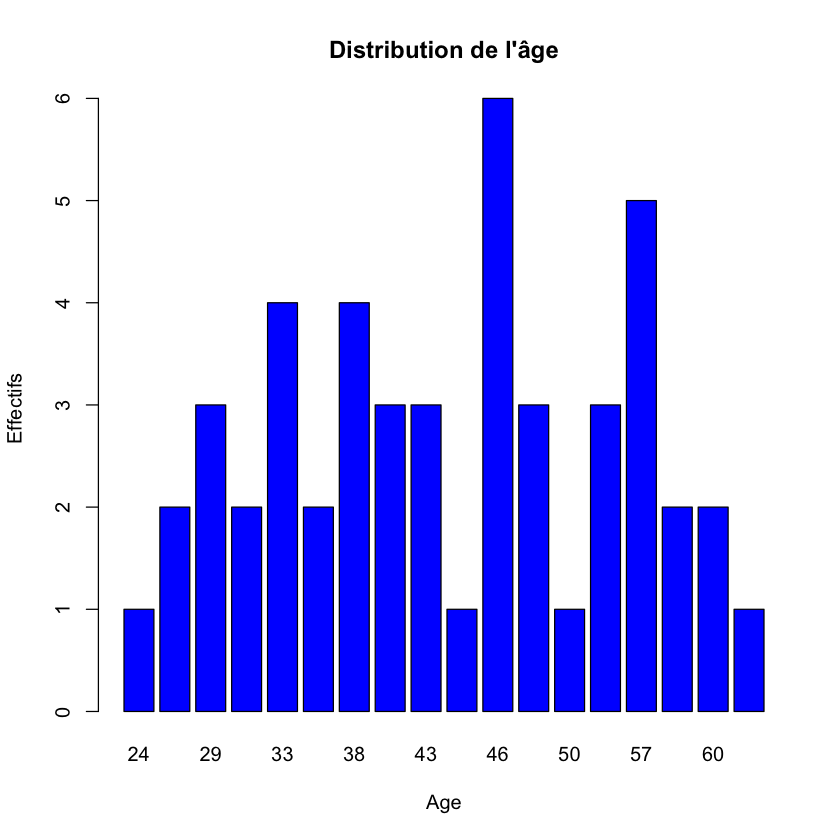

In [7]:
barplot(effectif,col="blue",main="Distribution de l'âge", xlab="Age",ylab="Effectifs")

<font color="blue">L'âge le plus fréquent dans ce jeu de données est 46 ans </font>

### Diagramme cumulatif

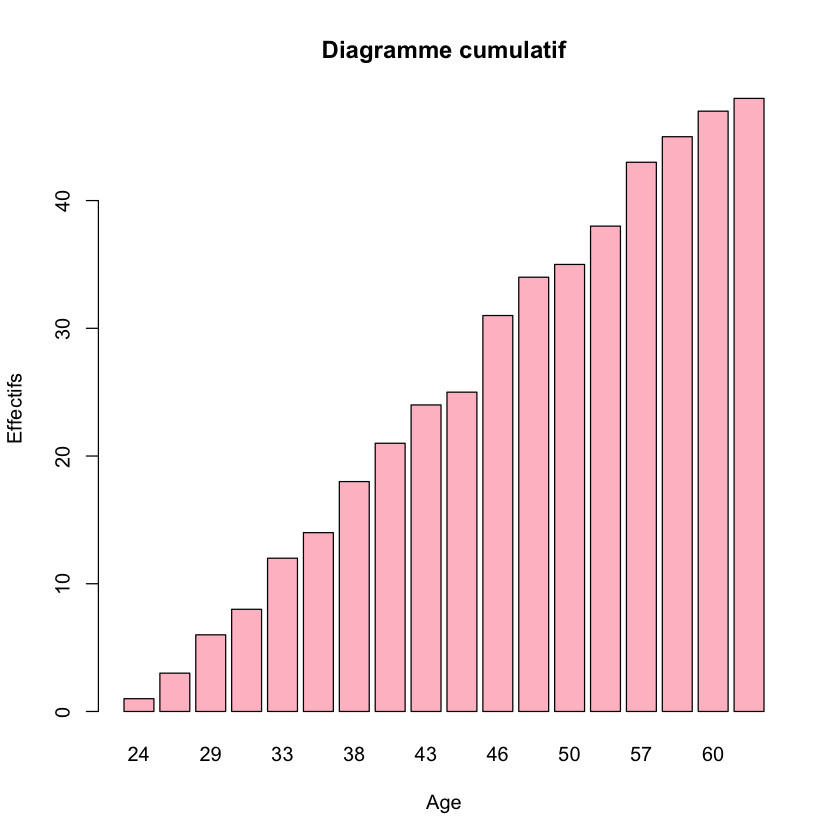

In [8]:
barplot(effectifCumu,col="pink",main="Diagramme cumulatif", xlab="Age",ylab="Effectifs")

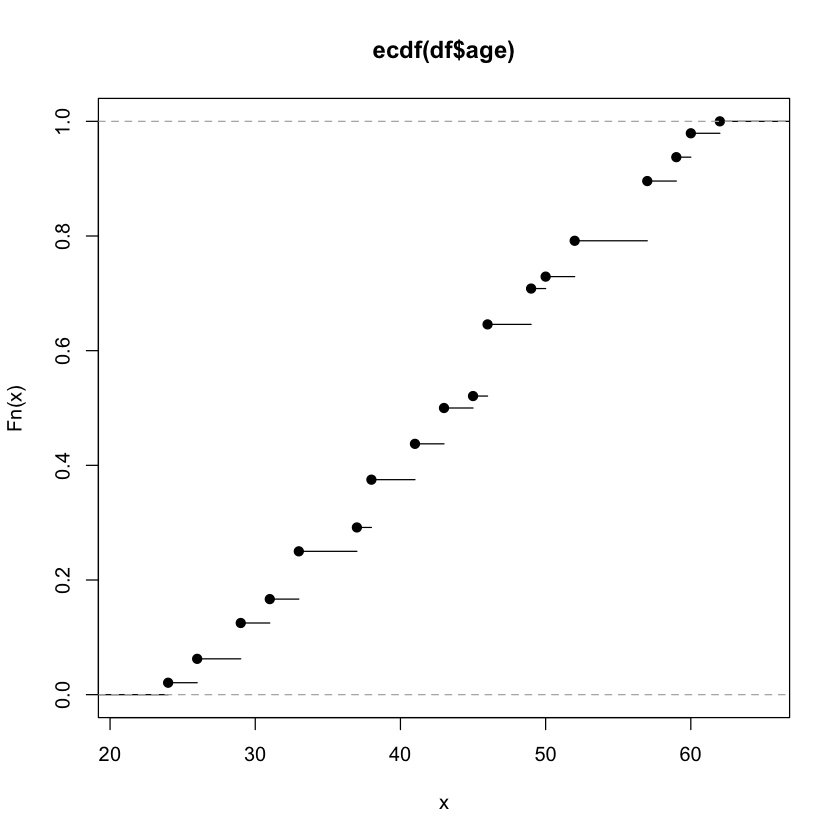

In [9]:
plot(ecdf(df$age))

### La médiane (quantile d’ordre 1/2) et les quartiles (quantile d’ordre1/4, 3/4)

In [10]:
quantile(df$age)

0%  25%  50%  75% 100% 
  24   36   44   52   62

### Moyenne

In [11]:
mean(df$age)

[1] 43.625

In [12]:
summary(df)

      age       
 Min.   :24.00  
 1st Qu.:36.00  
 Median :44.00  
 Mean   :43.62  
 3rd Qu.:52.00  
 Max.   :62.00  

## Dispersion

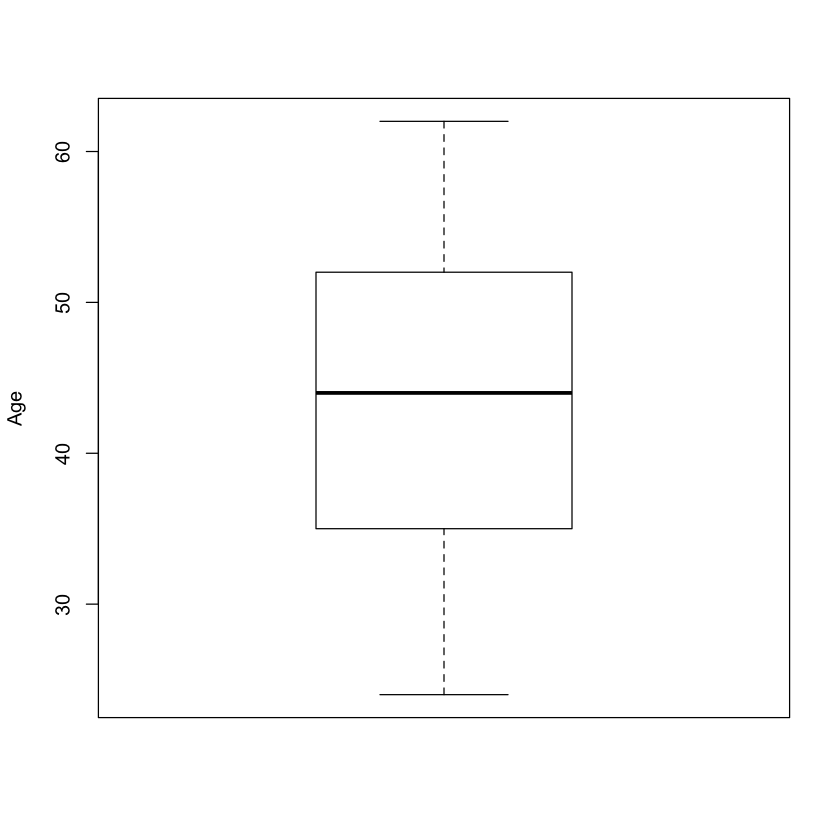

In [13]:
boxplot(df$age, ylab="Age")

### Variance

In [14]:
var(df)

age     
age 112.1117

### Ecart-type

In [15]:
sd(df$age)

[1] 10.58828

### Conclusion : 
<font color='blue'>  Ce tp montre qu'il est possible, à partir d'un jeu de données, de faire des statistiques simples. On peut visualiser la répartition des données, la fréquence, moyenne etc.</font> 

# <FONT COLOR="Red">TP 2</font>

### Introduction

L'objectif, sur ces données, est d'améliorer la prévision déterministe (MOCAGE), calculée par les services de MétéoFrance,  de la concentration d'ozone dans certaines stations de prélèvement.  Il s'agit d'un problème dit d'*adaptation statistique* d'une prévision locale de modèles à trop grande échelle en s'aidant d'autres variables également gérées par MétéoFrance, mais à plus petite échelle (température, force du vent...). C'est une première façon de concevoir de l'l'*IA hybride* entre un modèle déterministe et un algorithme d'apprentissage automatique. Plus précisément, deux variables peuvent être prévues : soit la concentration quantitative d'ozone, soit le dépassement (qualitatif) d'un certain seuil fixé à 150 $\mu g$. Dans chaque cas, deux approches sont considérées : soit prévoir la *concentration quantitative* puis en déduire l'éventuel dépassement ou bien prévoir directement le *dépassement*. Dans le premier cas, il s'agit d'abord d'une *régression* tandis que dans le deuxième il s'agit d'un problème de *discrimination* à deux classes ou de régression logistique. 

La question posée est donc: quelles sont les meilleures méthodes et stratégies pour prévoir la concentration d'ozone du lendemain d'une part et l'occurrence d'un pic de pollution d'autre part.

On se propose de tester différentes méthodes : régression [logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf), [analyse discriminante](http://wikistat.fr/pdf/st-m-app-add.pdf), [réseau de neurones](http://wikistat.fr/pdf/st-m-app-rn.pdf), [arbre de décision](http://wikistat.fr/pdf/st-m-app-cart.pdf), [agrégation d'arbres](http://wikistat.fr/pdf/st-m-app-agreg.pdf) (bagging, boosting, random forest), [SVM](http://wikistat.fr/pdf/st-m-app-svm.pdf).  L'objectif final, à ne pas perdre de vue, est la comparaison de ces méthodes afin de déterminer la plus efficace pour répondre au problème de prévision. Ceci passe par la mise en place d'un protocole très strict afin de s'assurer d'un minimum d'objectivité pour cette comparaison.

### Prise en charge des données

Les données ont été extraites et mises en forme par le service concerné de Météo France. Elles sont décrites par les variables suivantes:


* **JOUR** Le type de jour ; férié (1) ou pas (0) ;
* **O3obs** La concentration d'ozone effectivement observée le lendemain à 17h locales correspondant souvent au maximum de pollution observée ;
* **MOCAGE** Prévision de cette pollution obtenue par un modèle déterministe de mécanique des fluides (équation de Navier et Stockes);
* **TEMPE** Température prévue par MétéoFrance pour le lendemain 17h ;
* **RMH2O** Rapport d'humidité ;
* **NO2** Concentration en dioxyde d'azote ;
* **NO** Concentration en monoxyde d'azote ;
* **STATION** Lieu de l'observation : Aix-en-Provence, Rambouillet, Munchhausen, Cadarache et Plan de Cuques ;
* **VentMOD** Force du vent ;
* **VentANG** Orientation du vent.

In [16]:
# Lecture des données
path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
#path <- ""
ozone <- read.table(paste(path, "depSeuil.dat", sep = ""),
                    sep = ",", header = TRUE)
# Vérification du contenu
summary(ozone)

      JOUR            O3obs           MOCAGE          TEMPE      
 Min.   :0.0000   Min.   : 19.0   Min.   : 46.4   Min.   :10.40  
 1st Qu.:0.0000   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20  
 Median :0.0000   Median :109.0   Median :125.6   Median :23.80  
 Mean   :0.3045   Mean   :115.4   Mean   :127.2   Mean   :23.88  
 3rd Qu.:1.0000   3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60  
 Max.   :1.0000   Max.   :319.0   Max.   :284.7   Max.   :38.00  
     RMH2O              NO2               NO         STATION  
 Min.   :0.00285   Min.   : 0.258   Min.   :0.0010   Aix:199  
 1st Qu.:0.00763   1st Qu.: 1.248   1st Qu.:0.2360   Als:222  
 Median :0.00985   Median : 2.109   Median :0.3880   Cad:202  
 Mean   :0.01025   Mean   : 3.505   Mean   :0.6574   Pla:208  
 3rd Qu.:0.01244   3rd Qu.: 4.062   3rd Qu.:0.7440   Ram:210  
 Max.   :0.02753   Max.   :44.396   Max.   :9.4290            
    VentMOD           VentANG       
 Min.   : 0.1414   Min.   :-1.5708  
 1st Qu.: 3.9623   1st 

In [17]:
# Changement du type de la variable jour en facteur
ozone[, "JOUR"] <- as.factor(ozone[, "JOUR"])

### Exploration élémentaire

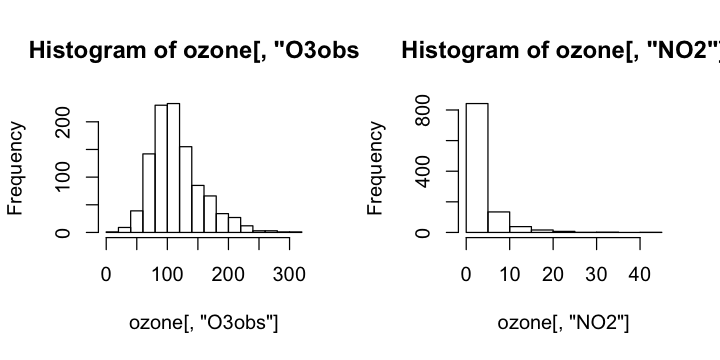

In [18]:
par(mfrow = c(1, 2))
options(repr.plot.width = 6, repr.plot.height = 3)
hist(ozone[, "O3obs"])
hist(ozone[, "NO2"])

<font color='blue'> La distribution de la variable O3obs est plutôt symétrique autour de 100 tandis que celle de la variable NO2 n'est pas symétrique mais dégressive </font>

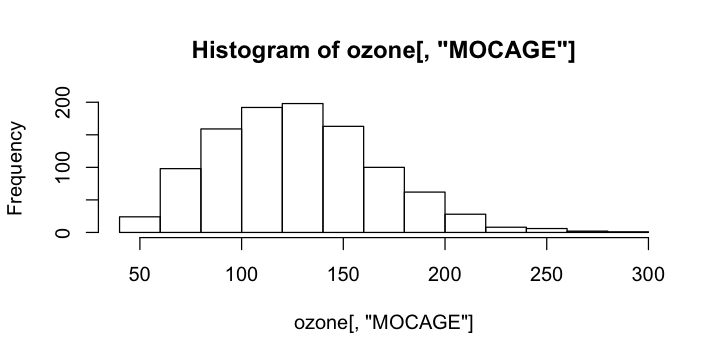

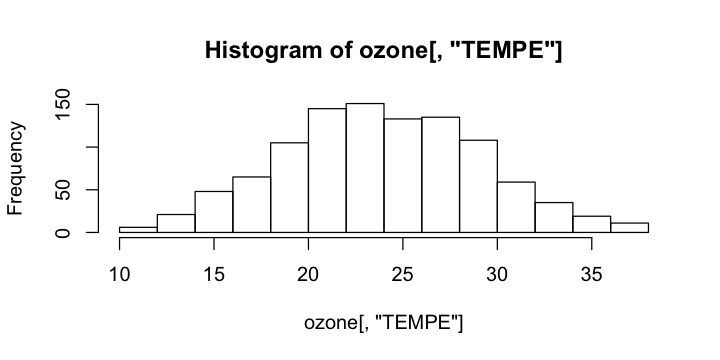

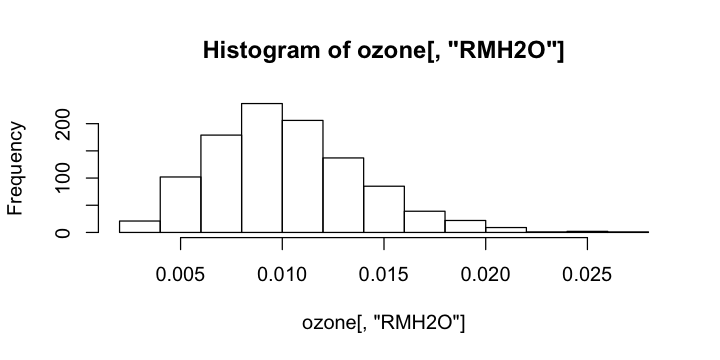

In [19]:
# Même chose pour les autres variables
hist(ozone[,"MOCAGE"]);hist(ozone[,"TEMPE"]);hist(ozone[,"RMH2O"])

<font color='blue'>La variable TEMPLE a une distribution qui semble suivre une loi normale. Les variables MOCAGE et RMH20 ont une distribution qui ne semblent pas suivre de lois normales. En effet, elles ont une queue de distribution trop forte à droite pour potentiellement suivre une loi normale. On pourrait éventuellement penser à une loi exponentielle ?</font>

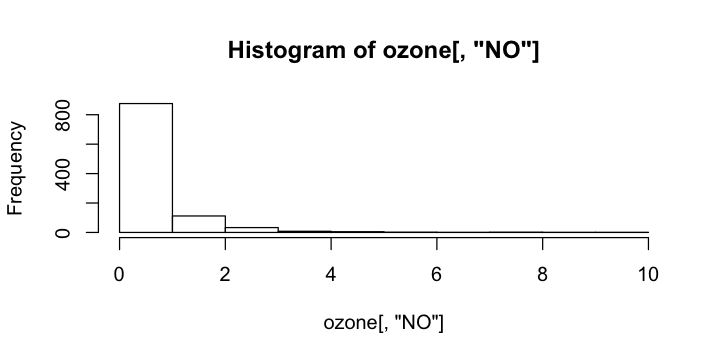

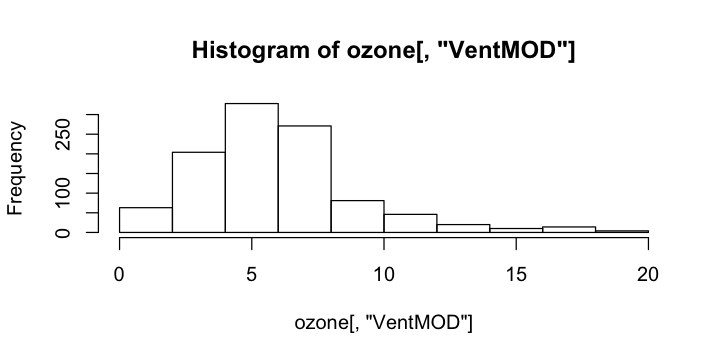

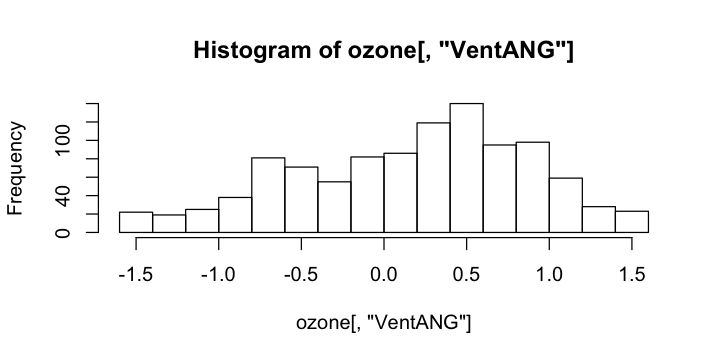

In [20]:
hist(ozone[,"NO"]);hist(ozone[,"VentMOD"]);hist(ozone[,"VentANG"])

<font color='blue'>Les variables NO, VentMOD et VentANG ne suivent pas de lois normales. En effet, les valeurs ne sont pas centrées en un seul pique ni distribuées uniformament proches de la moyenne.</font>

Des transformations sont proposées pour rendre certaines distributions plus symétriques et ainsi plus "gaussiennes". C'est nécessaire pour certaines méthodes à venir de modélisation (linéaires), par pour toutes (arbres).

In [21]:
ozone[, "SRMH2O"] <- sqrt(ozone[, "RMH2O"])
ozone[, "LNO2"] <- log(ozone[, "NO2"])
ozone[, "LNO"] <- log(ozone[, "NO"])

In [22]:
ozone <- ozone[, c(1:4, 8:13)]
ozone[, "DepSeuil"] <- as.factor(ozone[, "O3obs"] > 150)
summary(ozone)

 JOUR        O3obs           MOCAGE          TEMPE       STATION  
 0:724   Min.   : 19.0   Min.   : 46.4   Min.   :10.40   Aix:199  
 1:317   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20   Als:222  
         Median :109.0   Median :125.6   Median :23.80   Cad:202  
         Mean   :115.4   Mean   :127.2   Mean   :23.88   Pla:208  
         3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60   Ram:210  
         Max.   :319.0   Max.   :284.7   Max.   :38.00            
    VentMOD           VentANG            SRMH2O             LNO2        
 Min.   : 0.1414   Min.   :-1.5708   Min.   :0.05339   Min.   :-1.3548  
 1st Qu.: 3.9623   1st Qu.:-0.3948   1st Qu.:0.08735   1st Qu.: 0.2215  
 Median : 5.5973   Median : 0.2783   Median :0.09925   Median : 0.7462  
 Mean   : 5.9072   Mean   : 0.1631   Mean   :0.09957   Mean   : 0.8440  
 3rd Qu.: 7.1063   3rd Qu.: 0.6926   3rd Qu.:0.11153   3rd Qu.: 1.4017  
 Max.   :19.8910   Max.   : 1.5708   Max.   :0.16592   Max.   : 3.7931  
      LNO           

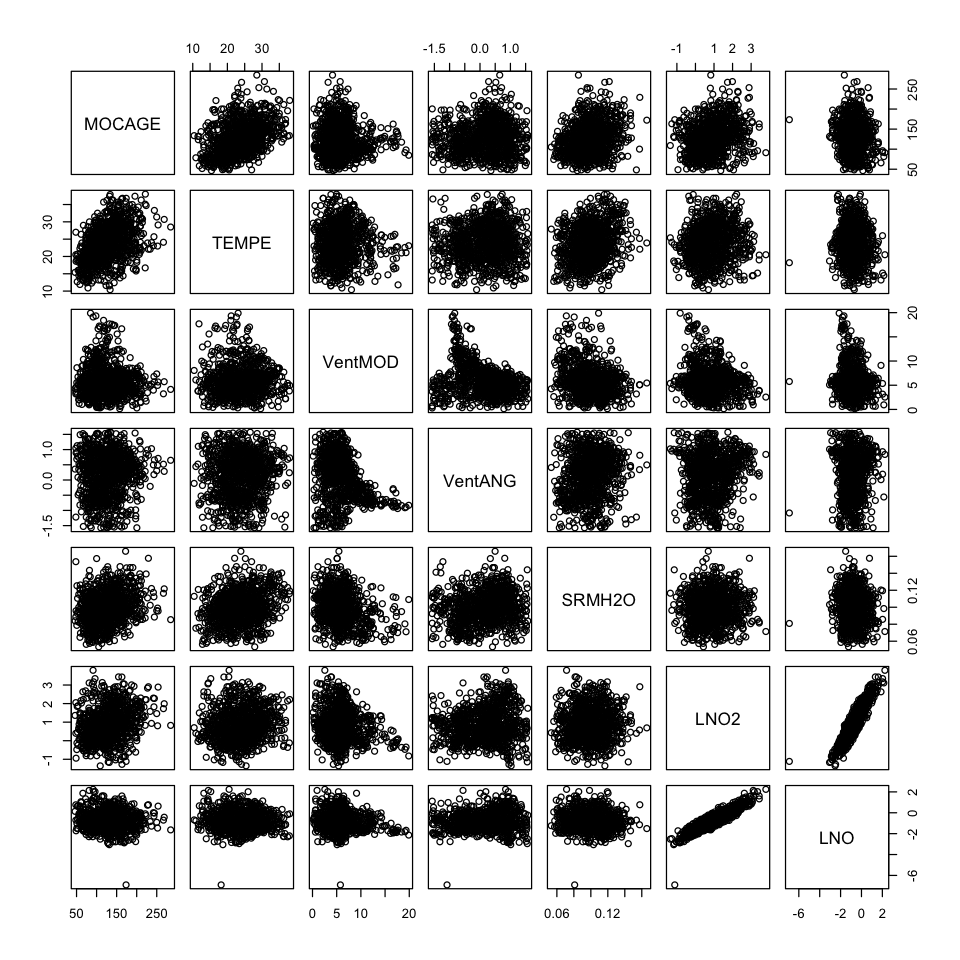

In [23]:
options(repr.plot.width = 8, repr.plot.height = 8)
pairs(ozone[, c(3, 4, 6:10)])

**Q** Que dire sur les relations des varibles 2 à 2 ?


<font color='blue'>Cette représentation graphique permet d'analyser la corrélation des variables 2 à 2. Si les points sont éparpillés alors cela signifie que les variables ne sont pas fortement corrélées. Pareillement, si les points sont regroupés/proches alors cela signigie que les variables sont corrélées.


LNO est LNO2 sont très fortement corrélées donc il semblerait qu'il y ai une redondance d'information à inclure ces deux variables dans un modèle.
Le seul autre couple de variable sur lequel on observe une correlation "positive" sont MOCAGE et TEMPE ce qui temps à dire que la varibale TEMPE a un poid fort sur le modèle determinste MOCAGE.

   
</font>

**Q** Compléter en visualisant les corrélations avec la fonction 'corrplot' (package `corrplot`). Quelle est la limite de ce type de diagnostic numérique : quel type de corrélation est mesuré ? 

In [24]:
source("http://www.sthda.com/upload/rquery_cormat.r")

In [25]:
mydata <- ozone[, c(3, 4, 6:10)]

corrplot 0.84 loaded



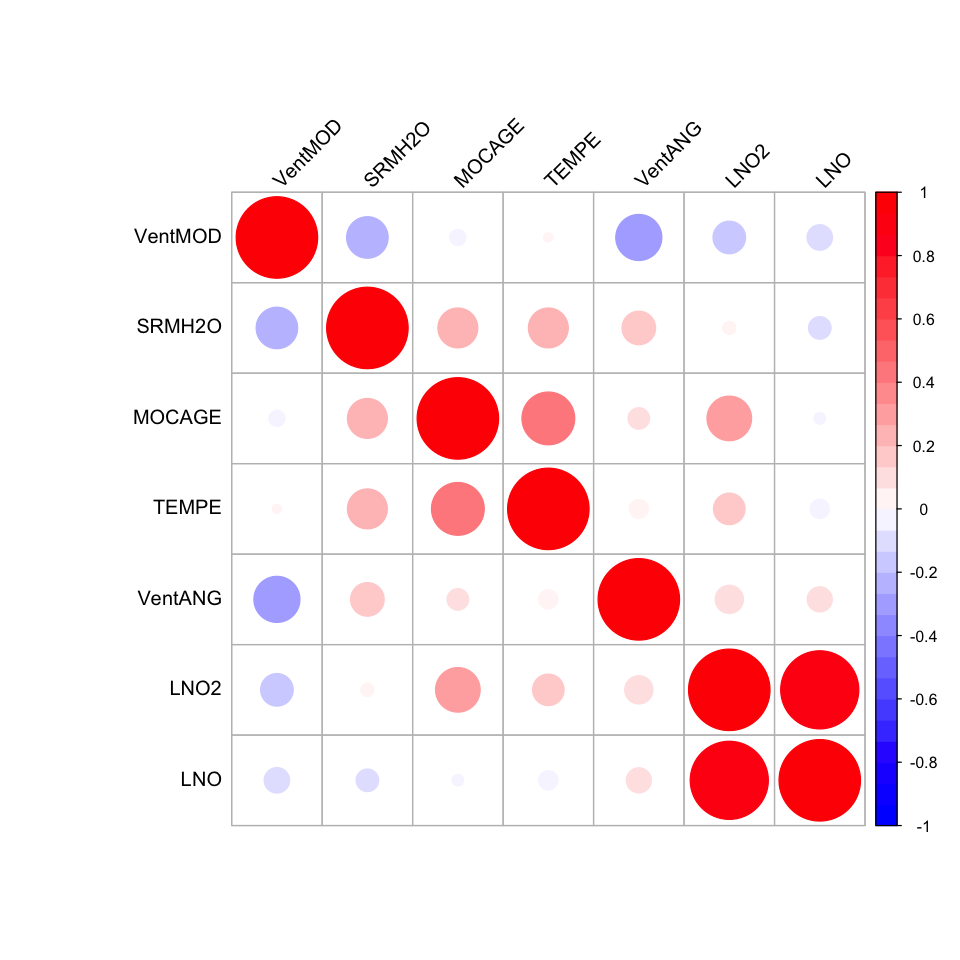

In [26]:
col<- colorRampPalette(c("blue", "white", "red"))(30)
cormat<-rquery.cormat(mydata, type="full", col=col)

<font color='blue'>Ce package permet de visualiser la correlation entre variables (de 0 à 1). On observe que ventANG et ventMOD ont une corrélation plutôt négative mais cette tendance ne s'obeserve pas vraiment sur le plot précedent de VentANG vs VentMOD car, sur ce plot, très peu de vents superieurs à une certaine vitesse ont été observés ce qui biaise la valeur de corrrelation. C'est un exemple de limite de ce type de visualisation.
</font>

## <font color="blue">On ajoute la variable O3obs pour voir avec quelles variables elle est corrélée </font>

In [27]:
mydata2 <- ozone[, c(2,3,4,6:10)]

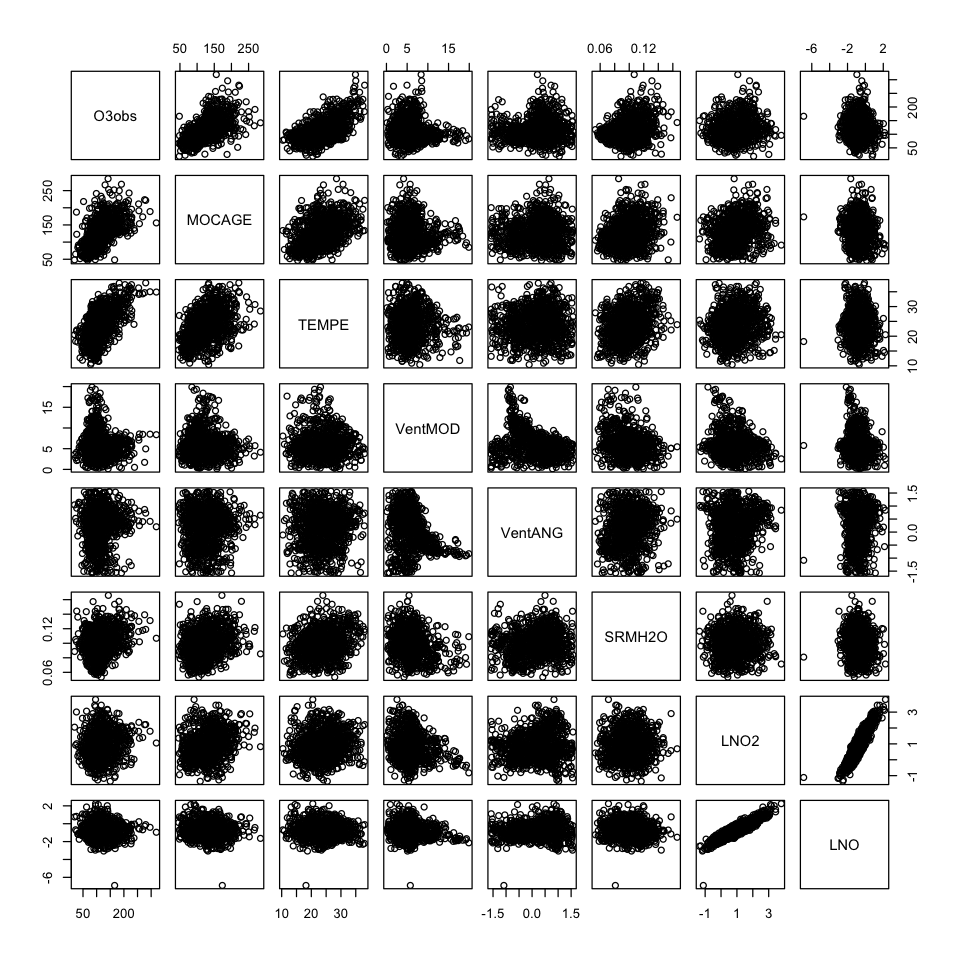

In [28]:
options(repr.plot.width = 8, repr.plot.height = 8)
pairs(mydata2)

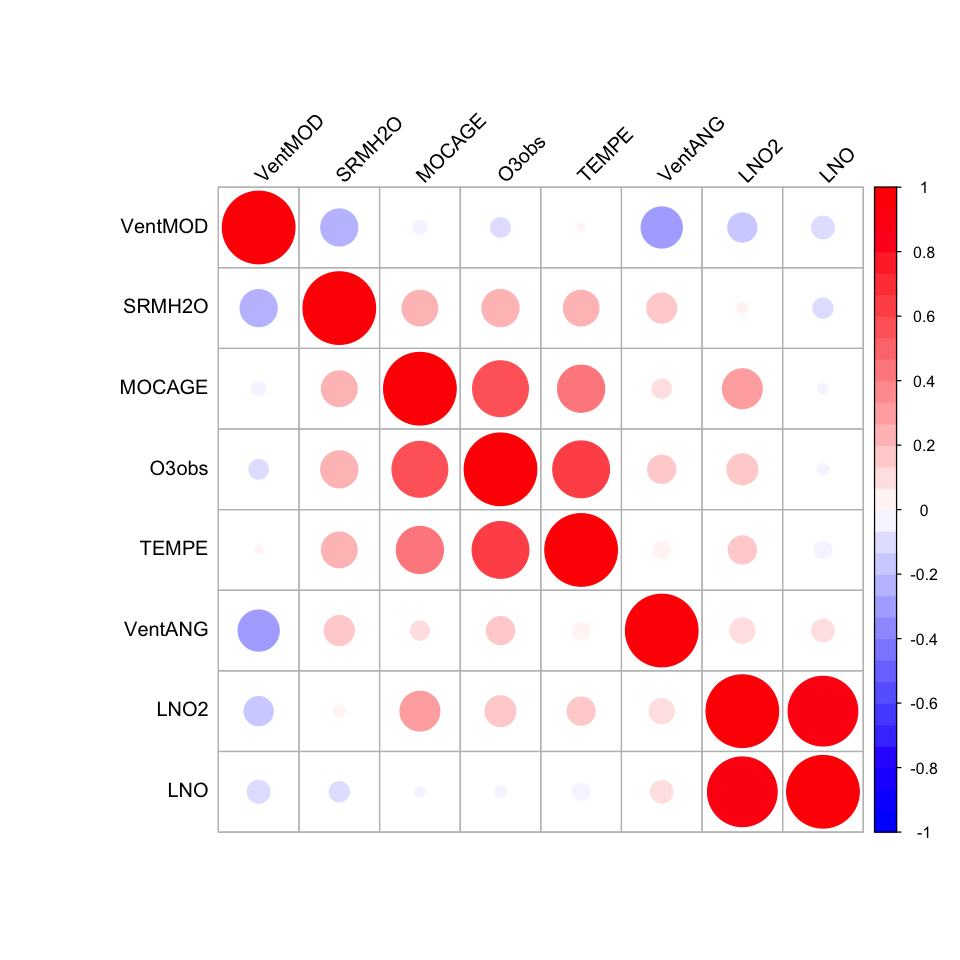

In [29]:
col<- colorRampPalette(c("blue", "white", "red"))(30)
cormat<-rquery.cormat(mydata2, type="full", col=col)

Les commandes suivantes permettent de réaliser une [analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf) sur les seules variables quantitatives. Par ailleurs la variable à modéliser  (O3obs, concentration observée) n'est pas utilisée.

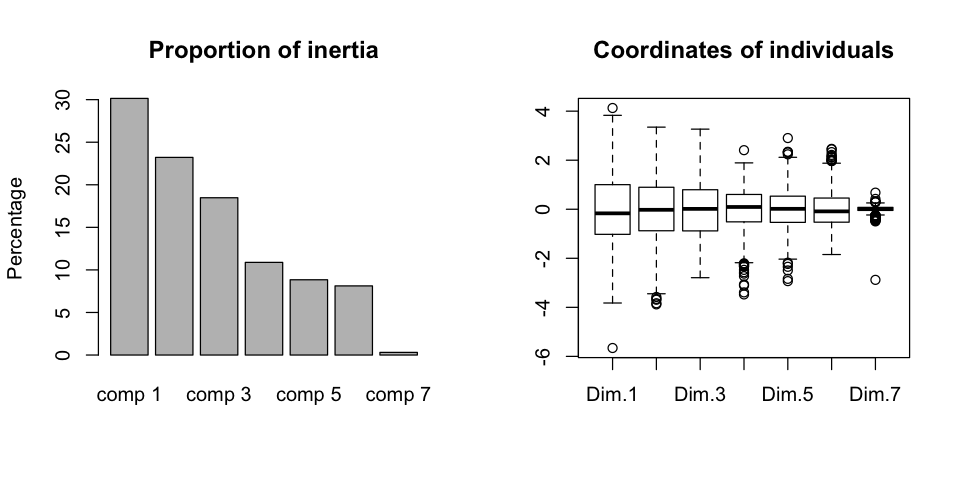

In [30]:
# ACP réduite
# Décroissance des valeurs propres
library(FactoMineR)
acp <- PCA(ozone[, c(11, 3:4, 6:10)], scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, ncp = 7)
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1, 2))
barplot(acp$eig[, 2], ylab = "Percentage", main = "Proportion of inertia")
boxplot(acp$ind$coord, main = "Coordinates of individuals")

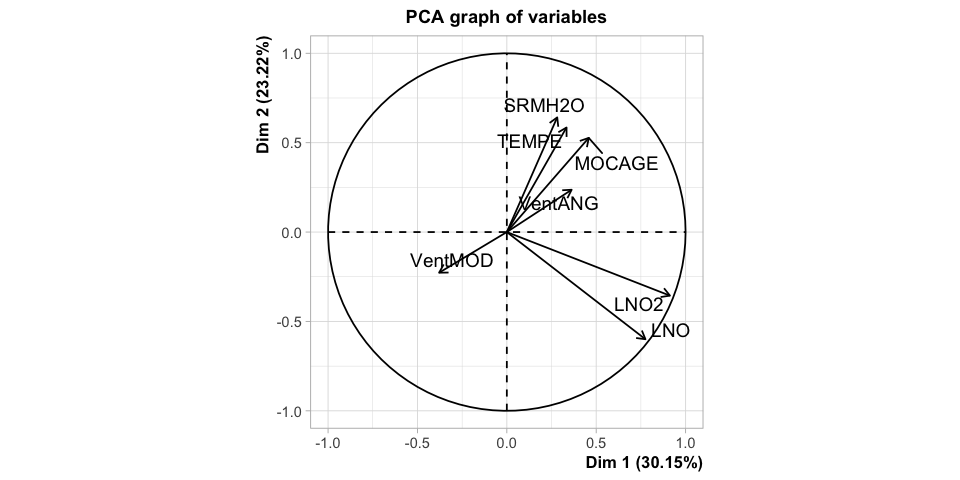

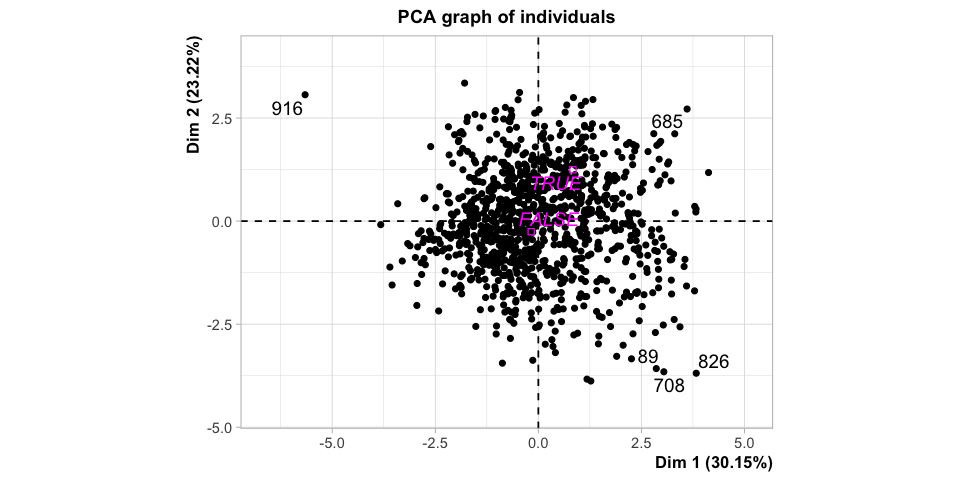

In [31]:
plot(acp, choix = "varcor")
plot(acp, choix = "ind", select = "contrib 5", unselect = 0)

**Q** Que sont ces graphiques?
<font color='blue'>
    
Ces graphiques sont obtenus après application de la PCA qui réduit en 2 dimensions les variables du jeu de données. Ainsi, il est possible de visualiser graphiquement plus simplement les corrélations par exemple entre variables. Pour le premier graphique, la corrélation entre variable est analysable en terme de degrès des vecteurs. Les vecteurs étant dans le même sens et ayant un coefficient directeur proches sont corrélés. De plus, si deux vecteurs ont le même angle mais pas la même direction, alors ils sont plus corrélés que deux vecteurs ayant une différence d'angle plus faible mais pas la même direction. 

Le deuxieme graphique permet, toujours en 2 dimensions, à visualiser la dispersion des points dans le même espace que le graphique precedent. Ainsi, cela permet, en plus de la corrélation données par les vecteur, de visualiser la quantité de données.</font>

**Q** Que dire du choix de la dimension, des valeurs atypiques?


<font color='blue'>La dimension obtenue avec le PCA permet de visualiser les résultats en 2 dimensions. Cela est très utile surtout dans ce type de cas où il y a de nombreuses variables dont la compréhension de la nature peut être complexe.</font>

**Q** Que dire de la structure de corrélation des variables ? Est-elle intuitive ?

<font color='blue'>La structure de corrélation des variables est intuitives dans le cas de la repésentation par vecteurs. En revanche, quand on analyse avec un nuage de points, cela devient plus compliqué, à l'oeil nu d'emettre des hypothèse sur les corrélations.</font>



Le même graphique en coloriant les jours.

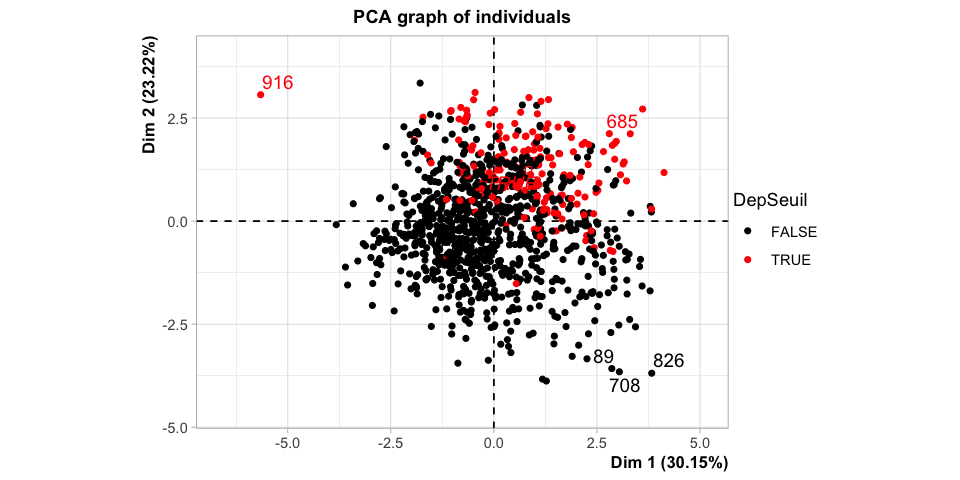

In [32]:
plot(acp, choix = "ind", habillage = 1,
     select = "contrib 5", unselect = 0)

L'objectif est donc de définir une surface séparant les deux classes. 

**Q** Une discrimination linéaire (hyperplan) semble-t-elle possible? 

<font color='blue'>Une discrimination linéaire ne semple pas possible car au niveau de l'origine du plan (0,0), les classes sont confondues.</font>


Ce n'est pas utile ici mais une classification non supervisée est facile à obtenir. Par exemple en 2 classes, par l'algorithme k-means. Donne t-elle la même information ?

<font color='blue'>L'application de l'algorithme kmeans permet de séparer de façon plus clair les données en 2 classes. En effet, cela ne sépare pas les données seulement en considérent 1 variable mais toutes.</font>

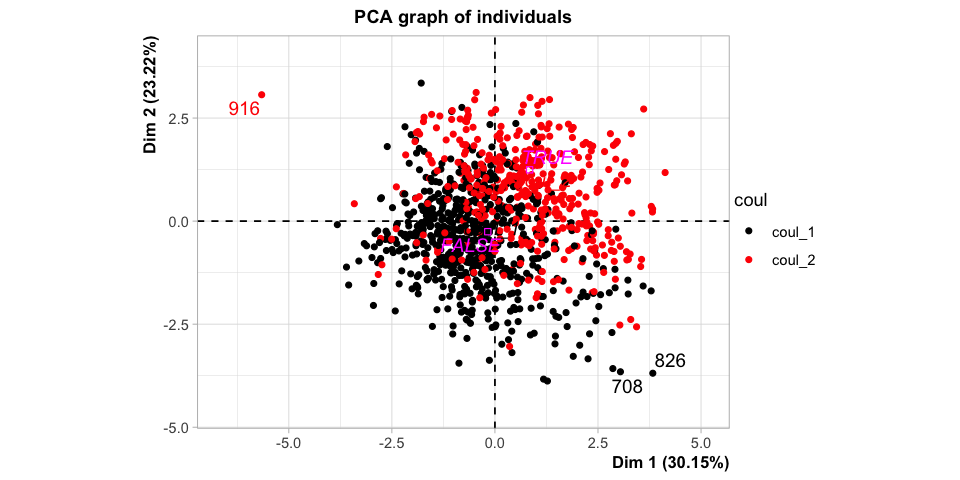

In [33]:
km.ozone <- kmeans(ozone[, c(3:4, 6:10)], centers = 2)
# Représentation dans les coordonnées de l'acp
acp2 <- PCA(cbind(coul = as.factor(km.ozone$cluster),
          ozone[, c(11, 3:4, 6:10)]), scale.unit = TRUE,
          graph = FALSE, quali.sup = 1:2, ncp = 7)
plot(acp2, choix = "ind", habillage = "coul",
     select = "contrib 3", unselect = 0)

### Protocole de comparaison

**Stratégie**

La recherche  d'une meilleure méthode de prévision suit le protocole suivant.

1. Etape descriptive préliminaire uni et multidimensionnelle visant à repérer les incohérences, les variables non significatives ou de distribution exotique, les individus non concernés ou atypiques... et à étudier les structures des données. Ce peut être aussi la longue étape de construction de variables, attributs ou *features* spécifiques des données. 
2. Procéder à un tirage aléatoire d'un échantillon *test* qui ne sera utilisé que lors de la *dernière étape* de comparaison des méthodes.
3. La partie restante est l'échantillon d'*apprentissage* pour l'estimation des paramètres des modèles.
4. Pour chacune des méthodes, optimiser la complexité des modèles en minimisant une estimation "sans biais" de l'erreur de prévision, par exemple par [*validation croisée*](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf):
    - Variables et interactions à prendre en compte dans la régression linéaire ou logistique;
    - variables et méthode pour l'analyse discriminante;
    - nombre de feuilles dans l'arbre de régression ou de classification;
    - architecture (nombre de neurones, pénalisation) du perceptron;
    - algorithme d'agrégation, 
    - noyau et pénalisation des SVMs.
5.  Comparaison des qualités de prévision sur la base du taux de mal classés pour le seul échantillon test qui est resté à l'écart de tout effort ou "acharnement" pour l'optimisation des modèles.

**Remarques**
* En cas d'échantillon relativement "petit" il est recommandé d'itérer la procédure de découpage apprentissage / test, afin de réduire la variance (moyenne) des estimations des erreurs de prévision.

**Q** Commenta appelle-t-on cette procédure spécifique de validation croisée?

<font color='blue'>Lorsque l'échantillon est relativement petit, il est recommandé de s'assurer que l'echantillon est stratifié, c'est à dire qu'il soit représentatif de la proportion des classes du jeu de données d'origine.</font>

* *Attention*: ne pas "tricher" en modifiant le modèle obtenu lors de l'étape précédente afin d'améliorer le résultat sur l'échantillon test!
* Le critère utilisé dépend du problème : erreur quadratique, taux de mauvais classement, entropie, AUC (aire sous la courbe ROC), indice de Pierce, *log loss function*...

**Extraction des échantillons**

In [34]:
set.seed(123) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(ozone) # nombre de lignes dans les données
nvar <- ncol(ozone) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

Construction des échantillons pour la régression: prévision de la concentration en ozone.

In [35]:
# construction de l'échantillon d'apprentissage
datappr <- ozone[appri, -11] 
# construction de l'échantillon test
datestr <- ozone[testi, -11] 
summary(datappr) # vérification

 JOUR        O3obs           MOCAGE          TEMPE       STATION  
 0:565   Min.   : 19.0   Min.   : 46.4   Min.   :10.40   Aix:154  
 1:267   1st Qu.: 87.0   1st Qu.: 96.8   1st Qu.:20.10   Als:185  
         Median :108.0   Median :124.2   Median :23.80   Cad:158  
         Mean   :114.5   Mean   :125.9   Mean   :23.89   Pla:164  
         3rd Qu.:134.0   3rd Qu.:152.7   3rd Qu.:27.60   Ram:171  
         Max.   :319.0   Max.   :284.7   Max.   :38.00            
    VentMOD           VentANG            SRMH2O             LNO2        
 Min.   : 0.1414   Min.   :-1.5708   Min.   :0.05339   Min.   :-1.2730  
 1st Qu.: 3.9395   1st Qu.:-0.4028   1st Qu.:0.08745   1st Qu.: 0.2289  
 Median : 5.6383   Median : 0.2555   Median :0.09917   Median : 0.7405  
 Mean   : 5.9093   Mean   : 0.1584   Mean   :0.09937   Mean   : 0.8293  
 3rd Qu.: 7.1694   3rd Qu.: 0.7214   3rd Qu.:0.11078   3rd Qu.: 1.3624  
 Max.   :19.3349   Max.   : 1.5708   Max.   :0.16592   Max.   : 3.7931  
      LNO         
 

Construction des échantillons pour la discrimination: prévision de dépassement.

In [36]:
# construction de l'échantillon d'apprentissage
datappq <- ozone[appri,-2]
# construction de l'échantillon test 
datestq <- ozone[testi,-2] 
summary(datappq) # vérification

 JOUR        MOCAGE          TEMPE       STATION      VentMOD       
 0:565   Min.   : 46.4   Min.   :10.40   Aix:154   Min.   : 0.1414  
 1:267   1st Qu.: 96.8   1st Qu.:20.10   Als:185   1st Qu.: 3.9395  
         Median :124.2   Median :23.80   Cad:158   Median : 5.6383  
         Mean   :125.9   Mean   :23.89   Pla:164   Mean   : 5.9093  
         3rd Qu.:152.7   3rd Qu.:27.60   Ram:171   3rd Qu.: 7.1694  
         Max.   :284.7   Max.   :38.00             Max.   :19.3349  
    VentANG            SRMH2O             LNO2              LNO         
 Min.   :-1.5708   Min.   :0.05339   Min.   :-1.2730   Min.   :-6.9078  
 1st Qu.:-0.4028   1st Qu.:0.08745   1st Qu.: 0.2289   1st Qu.:-1.4503  
 Median : 0.2555   Median :0.09917   Median : 0.7405   Median :-0.9429  
 Mean   : 0.1584   Mean   :0.09937   Mean   : 0.8293   Mean   :-0.8482  
 3rd Qu.: 0.7214   3rd Qu.:0.11078   3rd Qu.: 1.3624   3rd Qu.:-0.3086  
 Max.   : 1.5708   Max.   :0.16592   Max.   : 3.7931   Max.   : 2.2438  
  DepS

### Conclusion : 
<font color='blue'> Ce Tp est l'approfondissement du TP1. En effet, nous appliquons des analyses statistiques sur un jeu de données conséquent. Il est montré qu'il est important de comprendre les données avant d'appliquer des modèles dessus. Nous regardons donc les relations entre les variables : corrélation. Nous regardons aussi la repartition de chaque variable. Nous avons aussi appris qu'il est possible, lorsqu'il y a beaucoup de dimensions, de réduire les données en 2 dimensions afin d'avoir une nouvelle anaylse de celles-ci.
On fait ce qu'on appelle une étude empirique des données.</font>

# <FONT COLOR="Red">TP 3</font> 

## *Exercice du cours de regression linéaire*

Les données utilisées comportent 20 observations (parmi 50 à l'origine) correspondant à la vitesse d'automobiles et à la distance qui est nécessaire pour les stopper. Ce sont es données qui ont été relevées dans les années 1920. Les vitesses sont en miles par heure (*mph*) et les distances en pieds (*ft*).

In [37]:
vitesse = c(4,7,8,9,10,11,11,12,12,13,14,15,15,16,17,18,19,20,24,25)

In [38]:
distance=c(2,4,16,10,26,17,28,20,28,26,36,26,54,40,50,76,46,48,92,85)

**Q** Calculer la moyenne arithmétique des distances et celle des vitesses.

In [39]:
mean(vitesse)

[1] 14

In [40]:
mean(distance)

[1] 36.5

**Q** Calculer la variance des distances et celle des vitesses

In [41]:
var(vitesse)

[1] 29.78947

In [42]:
var(distance)

[1] 642.7895

**Q** Calculer la droite de regression $D_{D|V}$ de la distance par rapport à la vitesse.

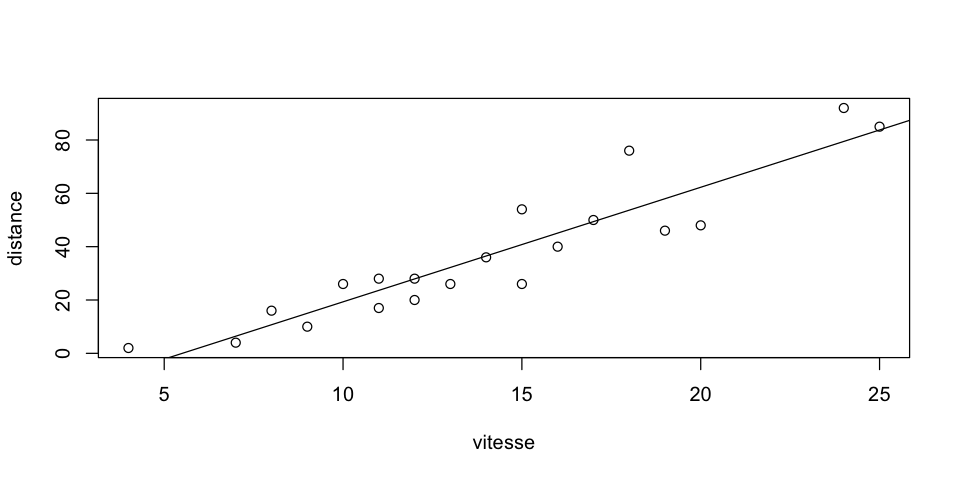

In [43]:
dframe<-data.frame(vitesse, distance)
model1 <- lm(distance ~ vitesse, dframe)
plot(distance ~ vitesse, dframe)
abline(model1)

In [44]:
coef(model1)

(Intercept)     vitesse 
  -23.65548     4.29682

In [45]:
summary(model1)


Call:
lm(formula = distance ~ vitesse, data = dframe)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7968  -6.3048  -0.2032   5.6325  22.3127 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -23.655      6.230  -3.797  0.00132 ** 
vitesse        4.297      0.416  10.329 5.42e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.897 on 18 degrees of freedom
Multiple R-squared:  0.8556,	Adjusted R-squared:  0.8476 
F-statistic: 106.7 on 1 and 18 DF,  p-value: 5.416e-09


**Q** Calculer la droite de regression $D_{V|D}$ de la vitesse par rapport à la distance.

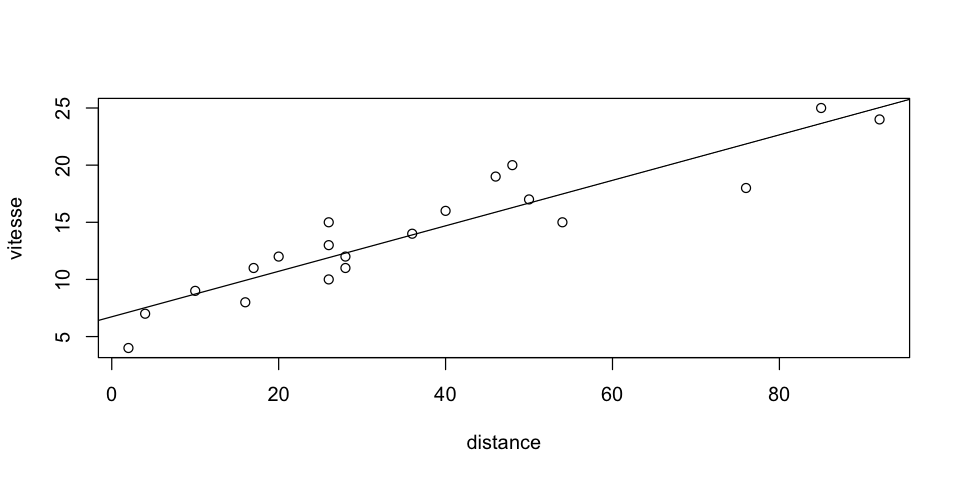

In [46]:
model2 <- lm(vitesse ~ distance, dframe)
plot(vitesse ~ distance, dframe) 
abline(model2)

In [47]:
coef(model2)

(Intercept)    distance 
  6.7316794   0.1991321

In [48]:
summary(model2)


Call:
lm(formula = vitesse ~ distance, data = dframe)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8657 -1.4578  0.1883  1.2900  3.7100 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.73168    0.84980   7.921 2.82e-07 ***
distance     0.19913    0.01928  10.329 5.42e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.131 on 18 degrees of freedom
Multiple R-squared:  0.8556,	Adjusted R-squared:  0.8476 
F-statistic: 106.7 on 1 and 18 DF,  p-value: 5.416e-09


**Q** Donner une représentation graphique des deux droites de regression (Vitesse/Distance) et (Distance/Vitesse). Calculer l'angle qu'elles font entre elles.

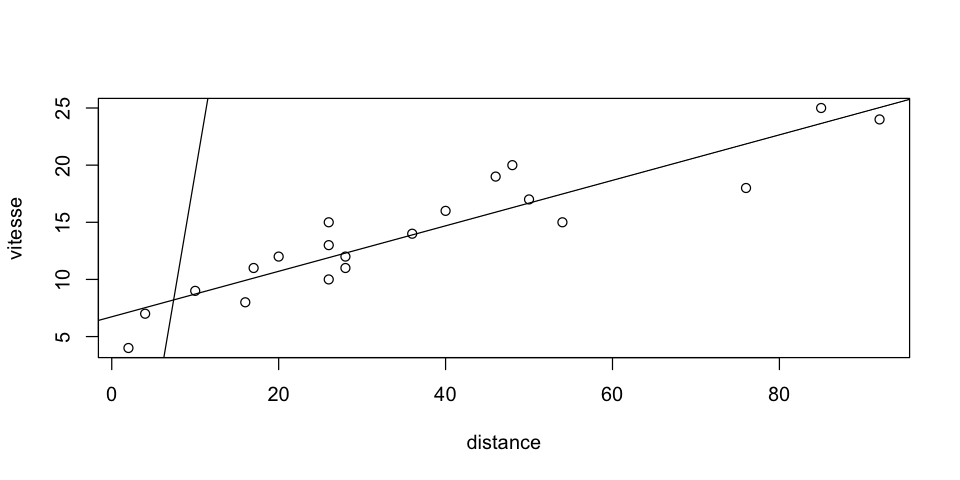

In [49]:
plot(vitesse ~ distance, dframe) 
abline(model1)
abline(model2)

In [50]:
y1<-coef(model1)
y2<-coef(model2)
b1<-y1[2]
a1<-y1[1]
b2<-y2[2]
a2<-y2[1]
angle<-(a1-a2)/(1+a1*a2)

In [51]:
angle

(Intercept) 
  0.1920308

**Q** Calculer le coefficient de corrélation linéaire. Que conclure sur le degré de dépendance entre les variables ?

In [52]:
cor(dframe$vitesse,dframe$distance)

[1] 0.9250052

<font color='blue'>La corrélation linéaire est très proche de 1, on en conclut que les variables vitesse et distance sont très corrélées.</font>

### Conclusion : 
<font color='blue'> Ce Tp montre comment comprendre les relations entre variables en utilisant la regression linéaire.</font>

# <FONT COLOR="Red">TP 4</font> 

## Prévision par modèle gaussien

Le premier modèle à tester est un simple modèle de régression linéaire mais, comme certaines variables sont qualitatives, il s'agit d'une analyse de covariance. D'autre part, on s'intéresse à savoir si des interactions sont à prendre en compte. Le modèle devient alors polynomial d'ordre 2 ou quadratique.

### Modèle linéaire

Le modèle de régression linéaire simple intégre des variables qualitatives; c'est dans ce cas une *analyse de covariance*  estimée par la fonction `aov` mieux adaptée à ce modèle.

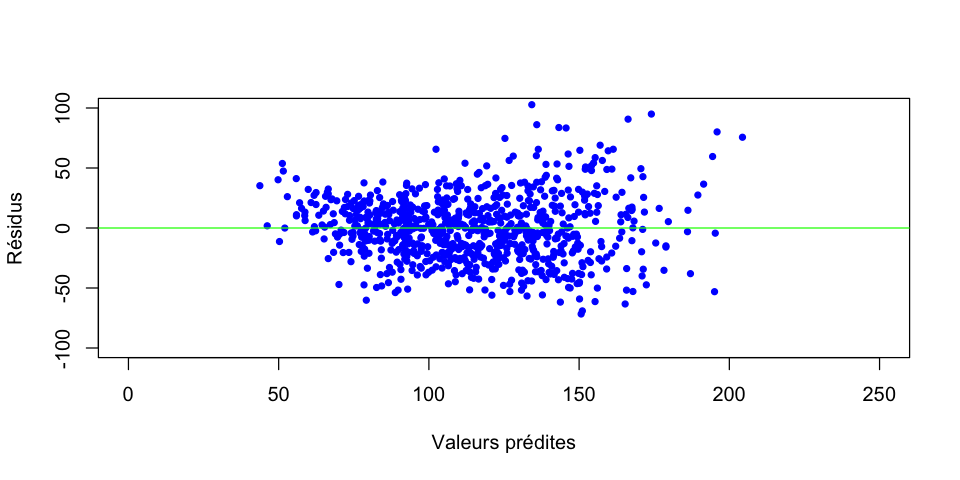

In [53]:
# estimation du modèle sans interaction
reg.lm <- aov(O3obs ~ . , data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# graphe des résidus. 
# Définition d'une fonction pour un graphe coloré 
# et des échelles fixes sur les axes
plot.res <- function(x,y,titre="titre")
{
plot(x, y, col = "blue", xlim = c(0, 250), ylim = c(-100, 100),
ylab = "Résidus", xlab = "Valeurs prédites", main = titre, pch = 20)
# points(x2, y, col="red")
abline(h = 0, col = "green")
}
plot.res(fit.lm,res.lm,"")

<font color='blue'>Les hypothèses du modèles sont que les résidus doivent suivrent une loi normale $N(0,sigma^2)$ avec $simga^2$ constants,supérieurs à 0 et indépendants.
Le graphique ci-dessus permet de verifier si les résidus sont centrés en 0. On observe que ce n'est pas complétement le cas. En effet, il y a des points en haut qui ne sont pas contrepartis en bas. On ne peut donc pas conclure sur une moyenne à 0.
    
Les 4 graphiques ci-dessous permettent de valider ou non certaines des autres hypothèses. </font>

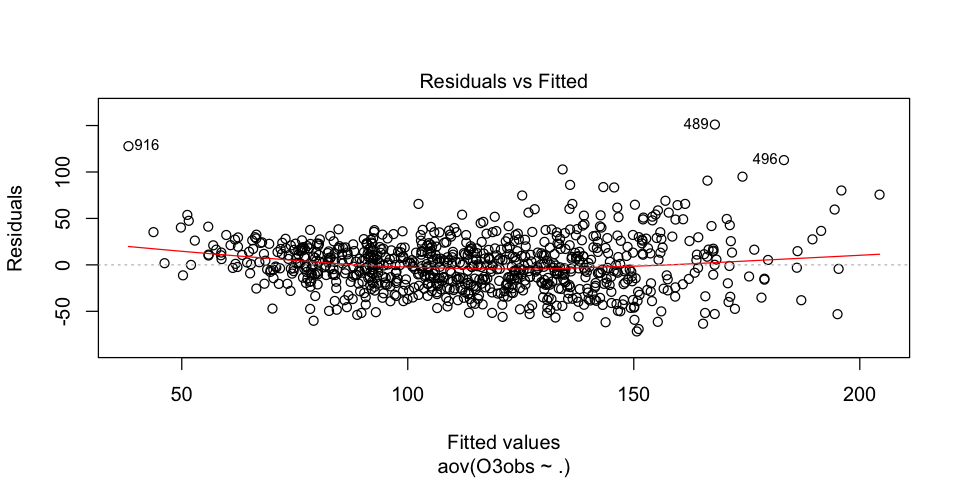

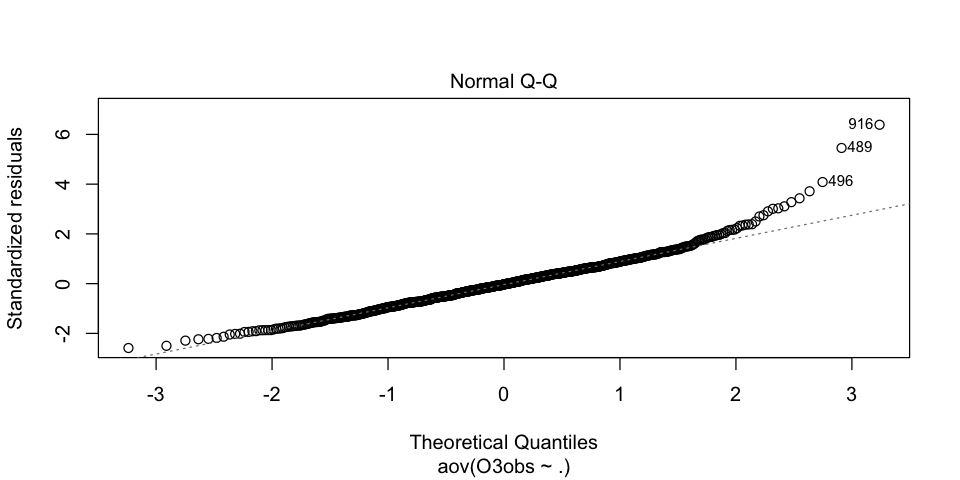

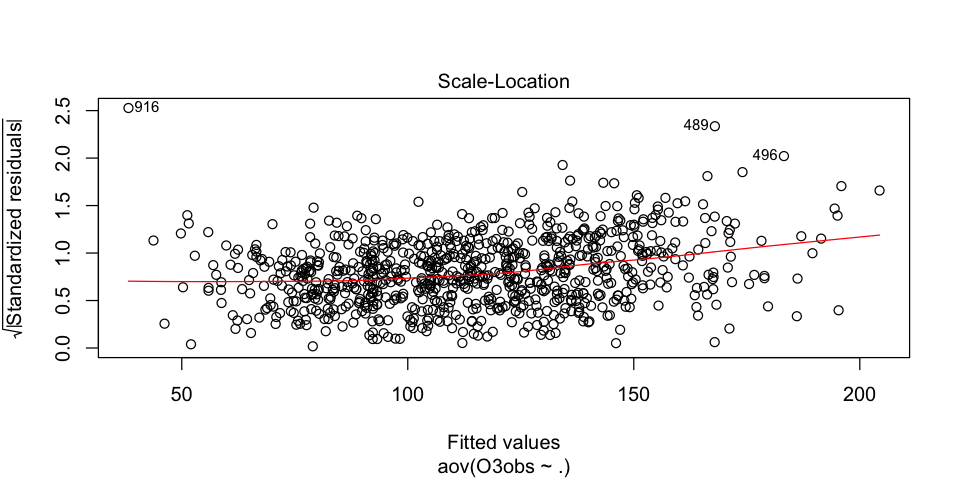

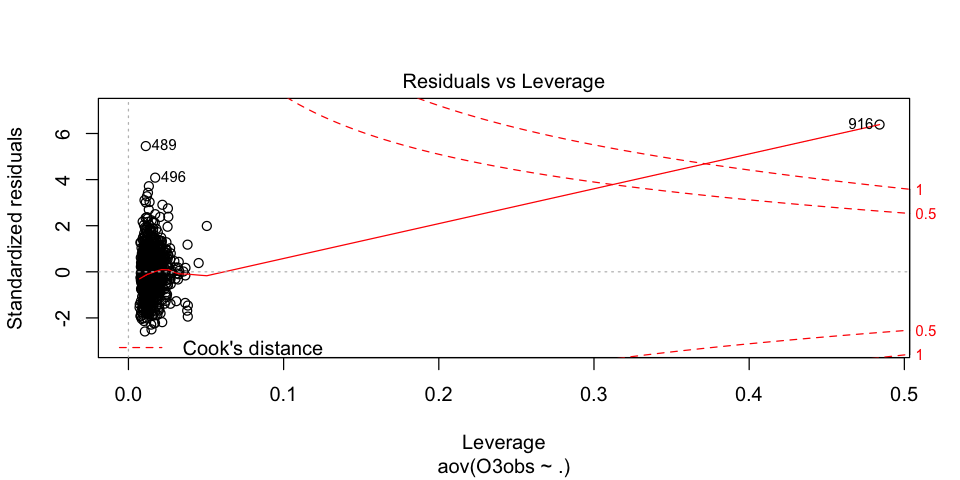

In [54]:
plot(reg.lm)

<font color='blue'>
    
- 1er graphique : 
    
les résidus sont plutôt centrés en 0 sauf au début et à la fin comme expliqué précédemment. De plus, la droite rouge devrait être une droite sur 0 si ils étaient vraiment centrés sur 0, ce qui n'est pas le cas. Ce graphique renforce la non validation de l'hypothèse d'une moyenne à 0.
De plus, la variance n'est pas constante. Plus les valeurs prédites sont grandes, plus la variance des résidus augmente.

    
    
- 2e graphique : 
    
Ce graphique nous permet de voir qu'à priori, les quantiles de la loi des résidus suivent une loi normale. Cependant, pour les gros résidus, les quantiles sont plus grands, il y a une plus grosse queue de distribution vers la droite qu'une loi normale.

    
    
- 3e graphique : 
    
Le 3e graphique permet d'observer des points abérrants. En effet, si la valeur de la racine carré d'un résidus standardisé est supérieure à 1,96, sachant qu'il n'y a que 5% de chance que ce soit le cas si les résidus suivent une loi normale, alors ils sont considérés comme abérrants. C'est le cas de plusieurs points.

    
   
- 4e graphique :
    
Ce graphique permet de visualiser "l'average" c'est à dire l'influence d'un point sur le modèle. Un des points "abérrants" détecter auparavant a un fort impact sur le modèle donc il fausse les coefficients de regression.</font>

**Q** Que dire de la distribution de ces résidus? 

<font color='blue'>La distribution n'est pas uniforme et pas reelement centrée sur 0.</font>

**Q** La forme du nuage renseigne sur les hypothèses de linéarité du modèle et d'homoscédasticité. Que dire de la validité de ce modèle?

<font color='blue'>Le modèle doit suivre une loi normale $N(0,sigma^2)$ de laquelle découle certaines hypothèses non validés dans ce cas. On en conclut qu'il n'est pas valide</font>

Apprécier néanmoins sa significativité par la commande suivante.

In [55]:
summary(reg.lm)

             Df Sum Sq Mean Sq F value   Pr(>F)    
JOUR          1    964     964   1.243 0.265189    
MOCAGE        1 468441  468441 603.952  < 2e-16 ***
TEMPE         1 218521  218521 281.735  < 2e-16 ***
STATION       4   5100    1275   1.644 0.161242    
VentMOD       1  10574   10574  13.633 0.000237 ***
VentANG       1  12105   12105  15.607 8.47e-05 ***
SRMH2O        1   2815    2815   3.630 0.057114 .  
LNO2          1   1550    1550   1.999 0.157807    
LNO           1   9310    9310  12.003 0.000559 ***
Residuals   819 635238     776                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

<font color='blue'>Ce tableau permet de voir les variables significatives pour le modèle. 
Si $Pvalue<0.05$ alors on considère que la variable est significative. Ici, les variables MOCAGE, TEMPE, VentANG et LNO sont significatives pour le modèle. On remarque d'ailleurs que si LNO est significative, LNO2 ne l'est pas alors que'elles sont très corrélées. Garder les deux et donc inutile. </font>

In [56]:
sqrt(mean(res.lm^2)) ## RMSE modèle linéaire

[1] 27.63163

**Q** Ce premier modèle est comparé avec celui de la seule prévision déterministe MOCAGE. Qu'en conclure?

<font color='blue'>Les deux modèles sont  proches mais le modèle MOCAGE seul est encore moins centré sur 0 et la variance est encore moins constante. Sa validité est donc moindre que celle du modèle précedent.</font>

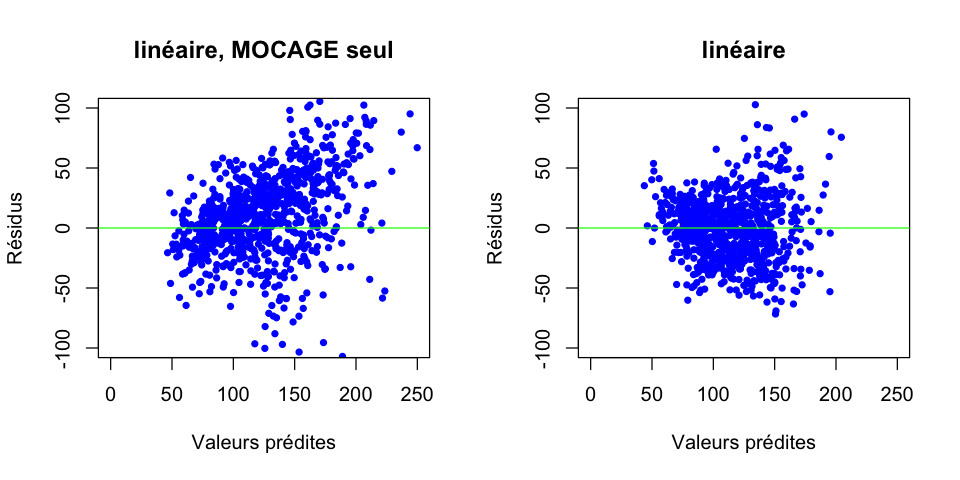

In [57]:
# Graphe des résidus du modèle déterministe MOCAGE
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1, 2))
plot.res(datappr[, "MOCAGE"],
         datappr[, "MOCAGE"] - datappr[, "O3obs"], "linéaire, MOCAGE seul")
plot.res(fit.lm, res.lm, "linéaire")
par(mfrow = c(1, 1))

#### Sélection de variable par régularisation L1 (LASSO)

Warning message:
“package ‘glmnet’ was built under R version 3.6.2”
Loading required package: Matrix

Loaded glmnet 4.1



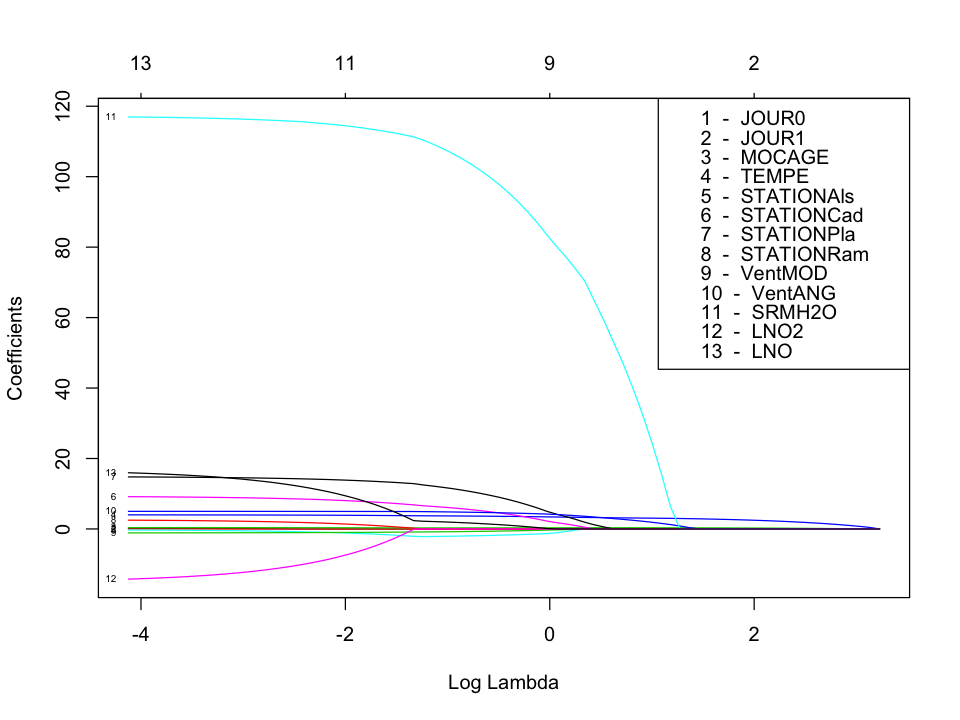

In [58]:
library(glmnet)
# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 2],
                           x = as.matrix(datappr[, -c(1, 2, 5)]))
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(O3obs ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$O3obs, x = x.mat)
options(repr.plot.width = 8, repr.plot.height = 6)
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

<font color='blue'>On rajoute une commande afin de visualiser plus précisement, pour chaque $lambda$ et non $Log(lambda)$ le nombre de variables qui ne sont pas "supprimées"</font>

In [59]:
reg.lasso


Call:  glmnet(x = x.mat, y = datappr$O3obs) 

   Df  %Dev  Lambda
1   0  0.00 25.2000
2   1  6.58 22.9700
3   2 13.66 20.9300
4   2 19.90 19.0700
5   2 25.08 17.3700
6   2 29.38 15.8300
7   2 32.95 14.4200
8   2 35.92 13.1400
9   2 38.38 11.9700
10  2 40.42 10.9100
11  2 42.12  9.9410
12  2 43.52  9.0580
13  2 44.69  8.2530
14  2 45.66  7.5200
15  2 46.47  6.8520
16  2 47.14  6.2430
17  2 47.70  5.6890
18  2 48.16  5.1830
19  2 48.54  4.7230
20  2 48.86  4.3030
21  3 49.25  3.9210
22  3 49.61  3.5730
23  4 49.93  3.2550
24  4 50.22  2.9660
25  4 50.46  2.7030
26  4 50.66  2.4630
27  4 50.82  2.2440
28  4 50.96  2.0440
29  4 51.07  1.8630
30  5 51.22  1.6970
31  5 51.34  1.5470
32  7 51.50  1.4090
33  8 51.69  1.2840
34  8 51.85  1.1700
35  8 51.99  1.0660
36  9 52.12  0.9713
37  9 52.26  0.8850
38  9 52.38  0.8064
39  9 52.47  0.7347
40  9 52.55  0.6695
41  9 52.62  0.6100
42  9 52.67  0.5558
43  9 52.72  0.5064
44  9 52.76  0.4614
45  9 52.79  0.4204
46  9 52.81  0.3831
47  9 52.83  

<font color='blue'>Le principe de lasso est de faire en sorte de garder peu de variable. Il applique des coefficients qui sont tirés vers 0 afin d'éliminer l'effet des variables peu intéressantes. Ainsi, il fait varier $lambda$ : plus $lambda$ est grand, plus les variables sont "pénalisées". 
Comme on peut voir dans le graphe précédent, les variables qui tiennent le plus longtemps sont celles qui sont le plus importantes pour le modèle.</font>

**Q** Que fait la commande model.matrix ? Comment sont gérées les variables catégorielles ?

<font color='blue'>model.matrix crée une "matrice de design". C'est une matrice de taille $(N*P)$ avec N le nombre d'observations et P le nombre de variables. On observe que dans le code, la création de la matrice de design se fait en supprimant la colonne de l'intercept, colonne remplie de 1 autrement.
Les variables catégorielles sont contraintes à des facteurs.</font>

**Q** Que représentent les courbes ci-dessus, appelées "chemins de régularisation"?
<font color='blue'> Les courbes, appelées "chemins de régularisation" représentent la valeur du coefficient estimé associé à la variable pour différente valeur de la pénalité appliquée par lasso : $log(lambda)$.</font>

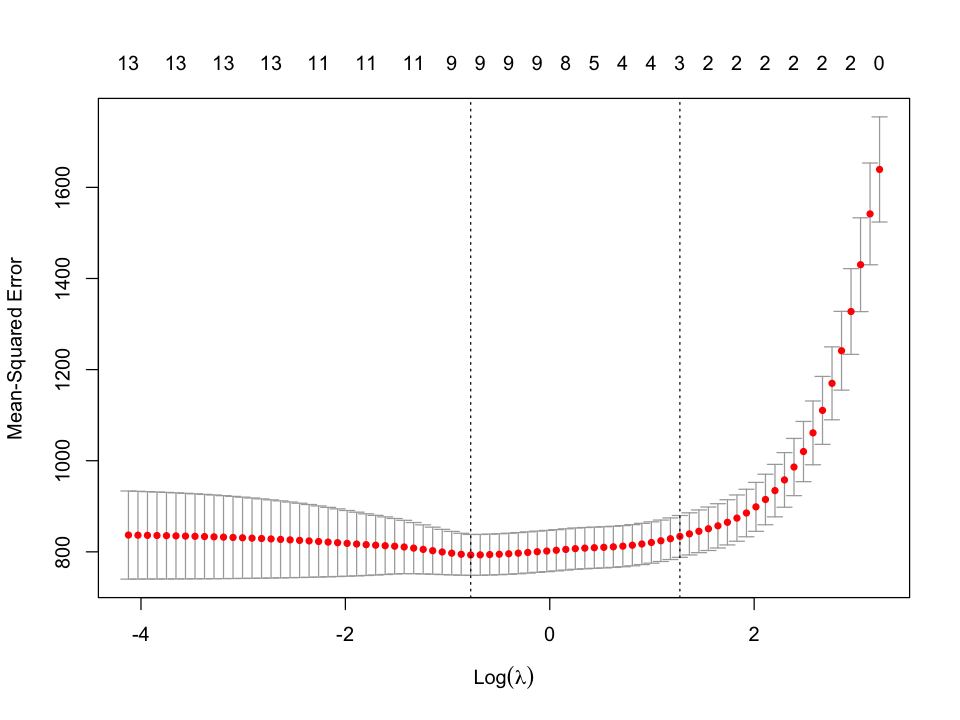

In [60]:
# choix du paramètre de régularisation par validation croisée
reg.lasso.cv <- cv.glmnet(y = datappr[, 2], x = x.mat)
plot(reg.lasso.cv)

<font color='blue'>Par cross validation, on essaye de trouver la valeur de $log(lambda)$ qui minimise l'erreur quadratique.</font>

**Q** Que représente la courbe rouge ? Et la bande qui est autour ? 
<font color='blue'>La courbe rouge représente l'erreur quadratique moyenne en fonction du log(lambda). La bande qui est autour représente l'intervalle de confiance.</font>

**Q** Comment sont obtenues les valeurs de log(lambda) correspondant aux lignes verticales en pointillé ?

<font color='blue'>La première ligne en pointillé (à gauche)est placée à la valeur minimum de l'erreur quadratique moyenne.

La deuxième correspond à la plus grande valeur de $log(lambda)$ qui reste dans l'intervalle accepté. En effet, un seuil de cette valeur est posé au préalable. L'objectif étant d'avoir une valeur la plus élevée possible sans trop influer sur l'erreur quadratique.  </font>

In [61]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 3.573"

14 x 1 sparse Matrix of class "dgCMatrix"
                    1
(Intercept) 1.5611447
JOUR0       .        
JOUR1       .        
MOCAGE      0.3329366
TEMPE       2.9684488
STATIONAls  .        
STATIONCad  .        
STATIONPla  .        
STATIONRam  .        
VentMOD     .        
VentANG     0.8430936
SRMH2O      .        
LNO2        .        
LNO         .        

**Q** Combien restent-ils de coefficients non nuls. Vérifier sur les chemins de régularisation.
<font color='blue'>Pour cette valeur de lambda, il reste 4 coefficeints non nuls (intercept comprit). On vérifie cette valeur dans le tableau précédent qui montre bien que pour $lambda=3,57$, le nombre de variables est 3 (l'intercept n'était pas compté dans la matrice de design, donc dans les variables).</font>
    
**Q** Même question en choisissant l'autre valeur de lambda retenue par glmnet, i.e. "reg.lasso.cv$lambda.min"

<font color='blue'> On observe qu'il reste maintenant 10 variables (intercept comprit) ce qui est logique car plus $lambda$ est petit, moins les variables sont "pénalisées".</font>

In [62]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.min")

[1] "CV estimate of lambda : 0.461"

14 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept) -19.6479845
JOUR0         .        
JOUR1         .        
MOCAGE        0.3072467
TEMPE         3.6587258
STATIONAls   -1.9623652
STATIONCad    5.4905714
STATIONPla   10.6115080
STATIONRam    .        
VentMOD      -0.7172606
VentANG       4.7444935
SRMH2O      103.6163970
LNO2          .        
LNO           1.6725729

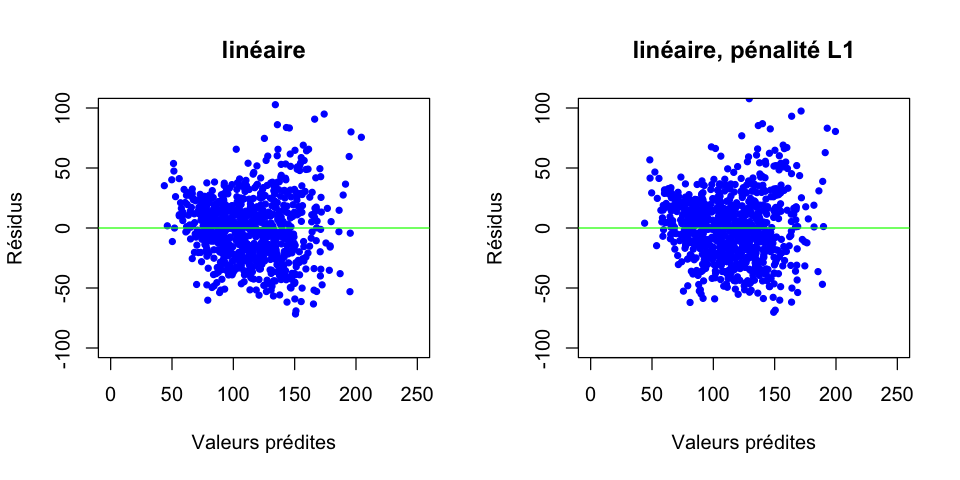

In [63]:
# Extraction des valeurs ajustées et des résidus
fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$O3obs - fit.lasso
# Graphe des résidus
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1")

**Q** Commenter. 
<font color='blue'>On observe que les modèles sont presque les même alors que des variables ont été "supprimées". On en conclut qu'enlever des variales n'a pas remédié aux problèmes susmentionnés ->  hétéroscédasticité (variance) et non centrage autour de 0.</font>


**Q** Calculer le critère MSE (moyenne des carrés des résidus) pour les deux modèles. Pourquoi celui obtenu par LASSO est-il moins bon ? Quel critère LASSO minimise t-il ?

<font color='blue'>Le MSE de LASSO est plus grand parce qu'il y a moins de variable. En réalité, il suffit d'ajouter beaucoup de variables pour diminuer le MSE. Ce n'est pas ce qu'on cherche ici ? On veut que le modèle soit le plus petit possible, c'est à dire qu'il ait le moins de variables possible mais une bonne prédiction.
    
Le premier modèle minimise l'erreur quadratique moyenne tandis que LASSO minismise l'erreur quadratique moyenne avec une penalité sur la norme 1 (somme des valeurs absolues) du paramètre $beta$ </font> 

In [64]:
mean(res.lm^2)

[1] 763.5072

In [65]:
mean(res.lasso^2)

[1] 774.8961

### Modèle quadratique

L'étude suivante met en oeuvre toutes les interactions d'ordre 2 entre les variables. Il s'agit donc d'un modèle de régression quadratique. Il est estimé avec la fonction glm qui permet une sélection automatique de modèle. La méthode descendante est utilisée mais celle pas-à-pas pourrait également l'être. Ce type de procédure n'est pas implémentée en python.

Sélection descendante: à chaque étape, chaque modèle est comparé à tous les sous-modèles possibles obtenus par suppression d'une des interactions ou une des variables, à condition qu'elle ne soit pas présente dans une interaction. La variable sélectionnée et supprimée est celle qui fait décroîre le critère considéré : AIC ou *Akaïke Information Criterion*. 

**Q** Quel autre critère, équivalent à AIC dans le cas gaussien et de variance résiduelle connue, est utilisée en régression linéaire? 

<font color='blue'>BIC Bayesian Information Criterieon : penalise encore plus le nombre de paramètre.
</font>

In [66]:
# Estimation du modèle de toute interaction d'ordre 2
reg.glm <- glm(O3obs ~ .^2, data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step <- step(reg.glm, direction = "backward")

Start:  AIC=7775.04
O3obs ~ (JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO)^2

                  Df Deviance    AIC
- STATION:VentANG  4   466934 7767.8
- JOUR:STATION     4   467365 7768.5
- STATION:LNO      4   468272 7770.1
- STATION:LNO2     4   468532 7770.6
- JOUR:LNO         1   466536 7773.1
- VentMOD:VentANG  1   466536 7773.1
- LNO2:LNO         1   466564 7773.1
- JOUR:MOCAGE      1   466567 7773.1
- MOCAGE:LNO2      1   466592 7773.2
- MOCAGE:LNO       1   466608 7773.2
- JOUR:LNO2        1   466614 7773.2
- VentMOD:LNO2     1   466647 7773.3
- TEMPE:VentANG    1   466810 7773.5
- TEMPE:VentMOD    1   466816 7773.6
- VentANG:SRMH2O   1   466890 7773.7
- JOUR:TEMPE       1   466924 7773.7
- VentMOD:LNO      1   466977 7773.8
- JOUR:SRMH2O      1   467300 7774.4
- JOUR:VentANG     1   467615 7775.0
<none>                 466530 7775.0
- VentANG:LNO2     1   467806 7775.3
- VentMOD:SRMH2O   1   467808 7775.3
- MOCAGE:VentANG   1   467855 7775.4


In [67]:
# Coefficients du modèle
anova(reg.glm.step, test = "F")

Df Deviance     Resid. Df Resid. Dev F            Pr(>F)       
NULL            NA           NA 831       1364618.9            NA            NA
JOUR             1 9.642305e+02 830       1363654.7  1.595718e+00  2.068876e-01
MOCAGE           1 4.684412e+05 829        895213.5  7.752295e+02 4.365858e-119
TEMPE            1 2.185214e+05 828        676692.1  3.616340e+02  1.437557e-66
STATION          4 5.099857e+03 824        671592.2  2.109955e+00  7.780965e-02
VentMOD          1 1.057406e+04 823        661018.2  1.749916e+01  3.199949e-05
VentANG          1 1.210514e+04 822        648913.0  2.003296e+01  8.743243e-06
SRMH2O           1 2.815143e+03 821        646097.9  4.658817e+00  3.119815e-02
LNO2             1 1.550295e+03 820        644547.6  2.565603e+00  1.096148e-01
LNO              1 9.309566e+03 819        635238.0  1.540652e+01  9.432718e-05
JOUR:VentMOD     1 1.103409e+03 818        634134.6  1.826046e+00  1.769861e-01
JOUR:SRMH2O      1 2.974118e+00 817        634131.6  4.921906e-03  9.440872e-01
JOUR:LNO2        1 1.717527e+03 816        632414.1  2.842357e+00  9.220833e-02
MOCAGE:TEMPE     1 2.375982e+04 815        608654.3  3.932043e+01  5.945033e-10
MOCAGE:STATION   4 1.181568e+04 811        596838.6  4.888482e+00  6.743940e-04
MOCAGE:VentMOD   1 1.031712e+04 810        586521.5  1.707394e+01  3.983065e-05
MOCAGE:VentANG   1 4.461983e+01 809        586476.9  7.384195e-02  7.858946e-01
MOCAGE:SRMH2O    1 5.528819e+03 808        580948.1  9.149715e+00  2.568995e-03
TEMPE:STATION    4 1.915165e+04 804        561796.4  7.923578e+00  2.909346e-06
TEMPE:SRMH2O     1 2.320473e+04 803        538591.7  3.840182e+01  9.307658e-10
TEMPE:LNO2       1 6.427885e+03 802        532163.8  1.063759e+01  1.156148e-03
TEMPE:LNO        1 9.258699e+02 801        531237.9  1.532234e+00  2.161489e-01
STATION:VentMOD  4 8.027961e+03 797        523210.0  3.321395e+00  1.038019e-02
STATION:SRMH2O   4 1.333297e+04 793        509877.0  5.516227e+00  2.209552e-04
STATION:LNO2     4 7.346383e+03 789        502530.6  3.039406e+00  1.676988e-02
VentMOD:SRMH2O   1 8.459170e+02 788        501684.7  1.399919e+00  2.370967e-01
VentMOD:LNO      1 1.600019e+03 787        500084.7  2.647892e+00  1.040901e-01
VentANG:SRMH2O   1 9.152064e+02 786        499169.5  1.514587e+00  2.188105e-01
VentANG:LNO2     1 2.162477e+03 785        497007.0  3.578712e+00  5.889374e-02
VentANG:LNO      1 1.650870e+04 784        480498.3  2.732047e+01  2.213652e-07
SRMH2O:LNO2      1 2.729312e+01 783        480471.0  4.516774e-02  8.317513e-01
SRMH2O:LNO       1 7.938645e+03 782        472532.4  1.313777e+01  3.081301e-04

In [68]:
# Comparer avec un modèle quadratique avec pénalité L1
x.mat2 <- model.matrix(O3obs ~ .^2 - 1, data = datappr)
reg.lasso2.cv <- cv.glmnet(y = datappr[, 2], x = x.mat2)
coef(reg.lasso2.cv, s = "lambda.1se")

74 x 1 sparse Matrix of class "dgCMatrix"
                               1
(Intercept)         6.125297e+01
JOUR0               .           
JOUR1               .           
MOCAGE              .           
TEMPE               .           
STATIONAls          .           
STATIONCad          .           
STATIONPla          .           
STATIONRam          .           
VentMOD             .           
VentANG             .           
SRMH2O             -3.240123e+02
LNO2                .           
LNO                 .           
JOUR1:MOCAGE        .           
JOUR1:TEMPE         .           
JOUR1:STATIONAls    .           
JOUR1:STATIONCad    .           
JOUR1:STATIONPla    .           
JOUR1:STATIONRam    .           
JOUR1:VentMOD       .           
JOUR1:VentANG       .           
JOUR1:SRMH2O        .           
JOUR1:LNO2          8.633903e-03
JOUR1:LNO           7.383135e-01
MOCAGE:TEMPE        1.176907e-02
MOCAGE:STATIONAls   .           
MOCAGE:STATIONCad   .           
M

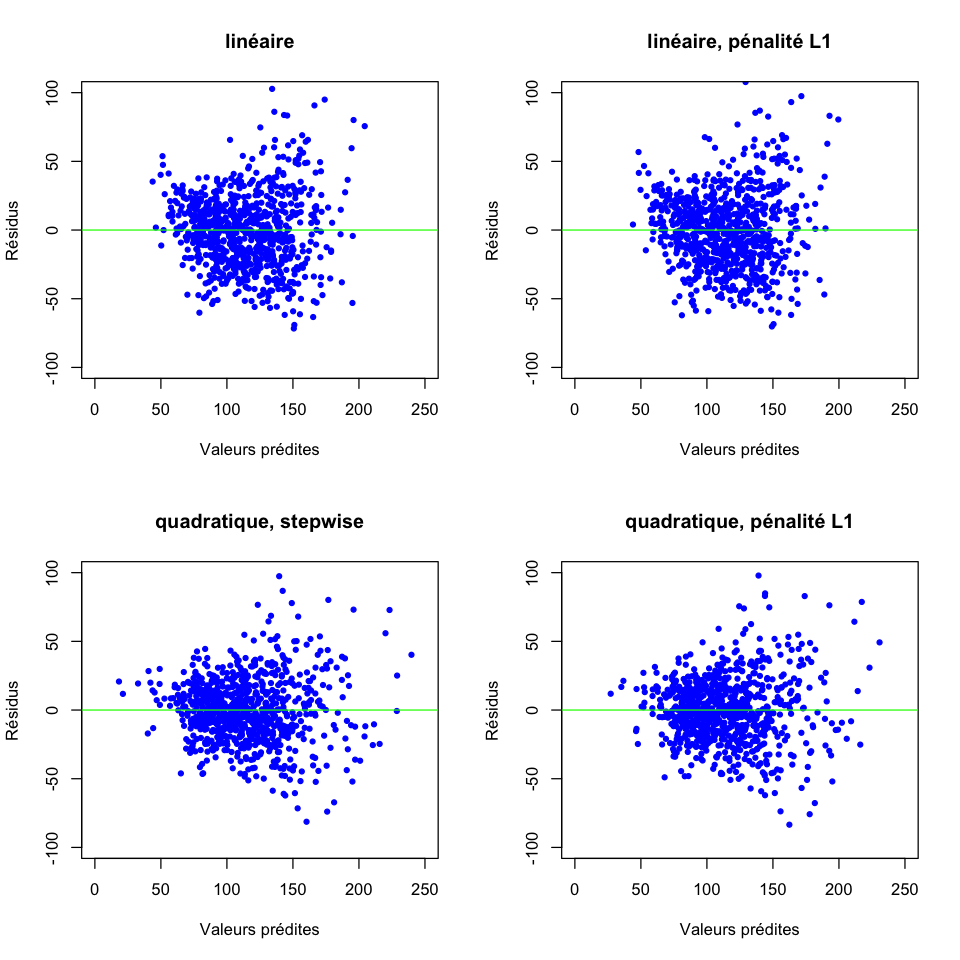

In [69]:
# Extraction des valeurs ajustées et des résidus
fit.glm <- reg.glm.step$fitted.values
res.glm <- reg.glm.step$residuals
fit.lasso2 <- predict(reg.lasso2.cv, s = "lambda.min", newx = x.mat2)
res.lasso2 <- datappr$O3obs - fit.lasso2
# Graphe des résidus
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow = c(2, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1")
plot.res(fit.glm, res.glm, "quadratique, stepwise")
plot.res(fit.lasso2, res.lasso2, "quadratique, pénalité L1")

On remarque que la présence de certains interactions ou variables sont pertinentes au sens du critère d'Akaïke mais pas significative au sens du test de Fisher. Cette présence dans le modèle pourrait être plus finement analysée en considérant une estimation de l'erreur par validation croisée. L'idée serait de retirer une à une les variables ou interactions les moins significatives pour voir comment se comporte la validation croisée. D'autre part, si la procédure pas-à-pas conduit à un modèle différent, l'estimation de l'erreur par validation croisée permet également d'optimiser le choix.
 
Ces raffinements ne s'avèrent pas efficaces sur ces données. Le modèle obtenu par minimisaiton du critère AIC est conservé.

### Prévision de l'échantillon test

Le modèle "optimal" obtenu par la méthode stepwise est utilisé pour prédire l'échantillon test et estimer ainsi, sans biais, une erreur de prévision. Deux erreurs sont estimées ; la première est celle quadratique pour la régression tandis que la deuxième est issue de la matrice de confusion qui croise les dépassements de seuils prédits avec ceux effectivement observés. 

In [70]:
# Calcul des prévisions
pred.glm <- predict(reg.glm.step, newdata = datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm - datestr[, "O3obs"])^2) / nrow(datestr)

[1] 632.1576

In [71]:
# Erreur quadratique par MOCAGE
sum((datestr[,"MOCAGE"] - datestr[,"O3obs"])^2) / nrow(datestr)

[1] 1577.113

In [72]:
# Matrice de confusion pour la prévision du dépassement de seuil
table(pred.glm > 150, datestr[, "O3obs"] > 150)

       
        FALSE TRUE
  FALSE   157   18
  TRUE      8   26

In [73]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil par MOCAGE
table(datestr[, "MOCAGE"] > 150, datestr[, "O3obs"] > 150)

       
        FALSE TRUE
  FALSE   131   14
  TRUE     34   30

Noter ces erreurs pour les comparer avec celles obtenues par les autres méthodes. Noter l'asymétrie des erreurs.

## Prévision par modèle binomial 

Plutôt que de prévoir la concentration puis le dépassement, on peut se poser la question de savoir s'il ne serait pas pertinent de prévoir directement la présence ou l'absence d'un dépassement. La variable à modéliser étant binaire, c'est la régression logistique qui va être employée. Comme pour la régression, différentes stratégies de choix de modèle peuvent être utilisées et comparées avant d'estimer l'erreur de prévision sur l'échantillon test.

### Régression logistique sans interaction

In [74]:
# estimation du modèle complet
log.lm <- glm(DepSeuil ~. , data = datappq, family = binomial)
# significativité des paramètres
anova(log.lm, test = "Chisq")

Df Deviance    Resid. Df Resid. Dev Pr(>Chi)    
NULL    NA          NA 831       734.5222             NA
JOUR     1   0.1647852 830       734.3575   6.847886e-01
MOCAGE   1 117.5971083 829       616.7604   2.124401e-27
TEMPE    1 149.8623985 828       466.8980   1.857959e-34
STATION  4  14.1091275 824       452.7888   6.954788e-03
VentMOD  1  11.1636715 823       441.6252   8.341468e-04
VentANG  1   1.6809416 822       439.9442   1.947994e-01
SRMH2O   1  16.3403451 821       423.6039   5.292510e-05
LNO2     1   0.2082303 820       423.3956   6.481580e-01
LNO      1   6.3539128 819       417.0417   1.171227e-02

In [75]:
# Recherche d'un modèle optimal au sens d'Akaïke
log.lm.step <- step(log.lm, direction = "backward")

Start:  AIC=443.04
DepSeuil ~ JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO

          Df Deviance    AIC
- MOCAGE   1   417.04 441.04
- JOUR     1   417.07 441.07
<none>         417.04 443.04
- VentANG  1   419.16 443.16
- VentMOD  1   420.89 444.89
- LNO2     1   422.16 446.16
- LNO      1   423.40 447.40
- STATION  4   436.03 454.03
- SRMH2O   1   434.14 458.14
- TEMPE    1   531.55 555.55

Step:  AIC=441.04
DepSeuil ~ JOUR + TEMPE + STATION + VentMOD + VentANG + SRMH2O + 
    LNO2 + LNO

          Df Deviance    AIC
- JOUR     1   417.07 439.07
<none>         417.04 441.04
- VentANG  1   419.18 441.18
- VentMOD  1   421.11 443.11
- LNO2     1   427.72 449.72
- LNO      1   427.88 449.88
- SRMH2O   1   434.40 456.40
- STATION  4   443.26 459.26
- TEMPE    1   536.28 558.28

Step:  AIC=439.07
DepSeuil ~ TEMPE + STATION + VentMOD + VentANG + SRMH2O + LNO2 + 
    LNO

          Df Deviance    AIC
<none>         417.07 439.07
- VentANG  1   419.18 439.18

In [76]:
# Modèle obtenu
anova(log.lm.step, test = "Chisq")

Df Deviance    Resid. Df Resid. Dev Pr(>Chi)    
NULL    NA          NA 831       734.5222             NA
TEMPE    1 235.1882740 830       499.3340   4.404738e-53
STATION  4  24.9944161 826       474.3396   5.044004e-05
VentMOD  1  24.8315098 825       449.5080   6.256632e-07
VentANG  1   2.6215573 824       446.8865   1.054209e-01
SRMH2O   1  18.5675412 823       428.3189   1.639892e-05
LNO2     1   0.4134857 822       427.9055   5.202056e-01
LNO      1  10.8350627 821       417.0704   9.959595e-04

In [77]:
# matrice de confusion de l'échantillon 
# d'apprentissage et erreur apparente
table(log.lm.step$fitted.values > 0.5, datappq[, "DepSeuil"])

       
        FALSE TRUE
  FALSE   678   65
  TRUE     20   69

In [78]:
pred.log <- predict(log.lm.step, newdata = datestq, type = "response")
# Matrice de confusion pour la prévision du 
# dépassement de seuil
table(pred.log > 0.5, datestq[, "DepSeuil"])

       
        FALSE TRUE
  FALSE   159   25
  TRUE      6   19

### Régression logistique avec interactions

Avec autant de variables et d'interactions donc de paramètres, l'estimation du modèle complet de régression logistique  rencontre des soucis et affiche des *warnings* car certaines probabilité trop bien ajustés (0 ou 1) provoquent des divisions par 0. Ici une procédure *forward* ou  mieux *stepwise* de sélection des variables et interactions  conduit à des résultats raisonnables. Une méthode avec pénalisation L1 peut aussi être utilisée.

In [79]:
# régression avec le modèle minimum
log.qm <- glm(DepSeuil ~ 1, data = datappq,family = binomial)
# algorithme stepwise en précisant le plus grand 
# modèle possible
log.qm.step1 <- step(log.qm, direction = "both",
    scope = list(lower = ~1, upper = ~(JOUR + MOCAGE + TEMPE + 
            STATION + VentMOD + VentANG + LNO2 + LNO + SRMH2O)^2), 
    family=binomial)

Start:  AIC=736.52
DepSeuil ~ 1

          Df Deviance    AIC
+ TEMPE    1   499.33 503.33
+ MOCAGE   1   616.81 620.81
+ SRMH2O   1   665.18 669.18
+ STATION  4   713.89 723.89
+ VentANG  1   723.09 727.09
+ LNO2     1   727.96 731.96
+ LNO      1   730.71 734.71
+ VentMOD  1   732.07 736.07
<none>         734.52 736.52
+ JOUR     1   734.36 738.36

Step:  AIC=503.33
DepSeuil ~ TEMPE

          Df Deviance    AIC
+ MOCAGE   1   466.91 472.91
+ SRMH2O   1   468.52 474.52
+ STATION  4   474.34 486.34
+ VentANG  1   489.75 495.75
+ VentMOD  1   491.61 497.61
+ LNO      1   495.73 501.73
<none>         499.33 503.33
+ JOUR     1   499.32 505.32
+ LNO2     1   499.33 505.33
- TEMPE    1   734.52 736.52

Step:  AIC=472.91
DepSeuil ~ TEMPE + MOCAGE

               Df Deviance    AIC
+ SRMH2O        1   446.96 454.96
+ STATION       4   452.83 466.83
+ LNO           1   460.34 468.34
+ VentANG       1   461.91 469.91
+ LNO2          1   462.00 470.00
+ VentMOD       1   463.96 471.96
<none>  

In [80]:
anova(log.qm.step1, test = "Chisq")

Df Deviance   Resid. Df Resid. Dev Pr(>Chi)    
NULL           NA         NA 831       734.5222             NA
TEMPE           1 235.188274 830       499.3340   4.404738e-53
MOCAGE          1  32.423381 829       466.9106   1.239857e-08
SRMH2O          1  19.948650 828       446.9619   7.955010e-06
STATION         4  16.500681 824       430.4613   2.415908e-03
VentMOD         1   5.396408 823       425.0649   2.017824e-02
LNO             1   1.118036 822       423.9468   2.903418e-01
SRMH2O:STATION  4  12.400521 818       411.5463   1.460862e-02
TEMPE:SRMH2O    1   5.378442 817       406.1679   2.038708e-02
MOCAGE:VentMOD  1   7.111395 816       399.0565   7.659548e-03
MOCAGE:STATION  4  12.921689 812       386.1348   1.166484e-02
STATION:LNO     4  15.765331 808       370.3694   3.350775e-03
TEMPE:MOCAGE    1   8.418402 807       361.9510   3.714421e-03

In [81]:
# Prévision
pred.log <- predict(log.qm.step1, newdata = datestq, type = "response")
# Matrice de confusion pour la prévision du 
# dépassement de seuil
table(pred.log > 0.5, datestq[, "DepSeuil"])

       
        FALSE TRUE
  FALSE   162   24
  TRUE      3   20

Comparer avec l'approche précédente. Mémoriser les résultats obtenus pour comparer avec les autres méthodes.

<font color='blue'>Les modèles ont à peu près les mêmes resultats ! Donc le fait de rajouter autant de variable n'est pas utile et risque d'engendrer un effet d'over fitting
</font>

### Courbe ROC
Il est également possible de construire une courbe ROC en association de la prévision obtenue à partir d'un modèle gaussien. En effet, la variation du seuil théorique de dépassement (150) va faire varier les proportions respectives des taux de vrais et faux positifs. Cela revient encore à faire varier le seuil d'une "proba" pour les valeurs de prévisions divisées par 300.

In [82]:
install.packages("ROCR")


The downloaded binary packages are in
	/var/folders/v6/tzh3d58j3q79tqlj3n83vwnr0000gn/T//RtmpaeeuaP/downloaded_packages


In [83]:
library(ROCR)   # Librairie à charger

Warning message:
“package ‘ROCR’ was built under R version 3.6.2”


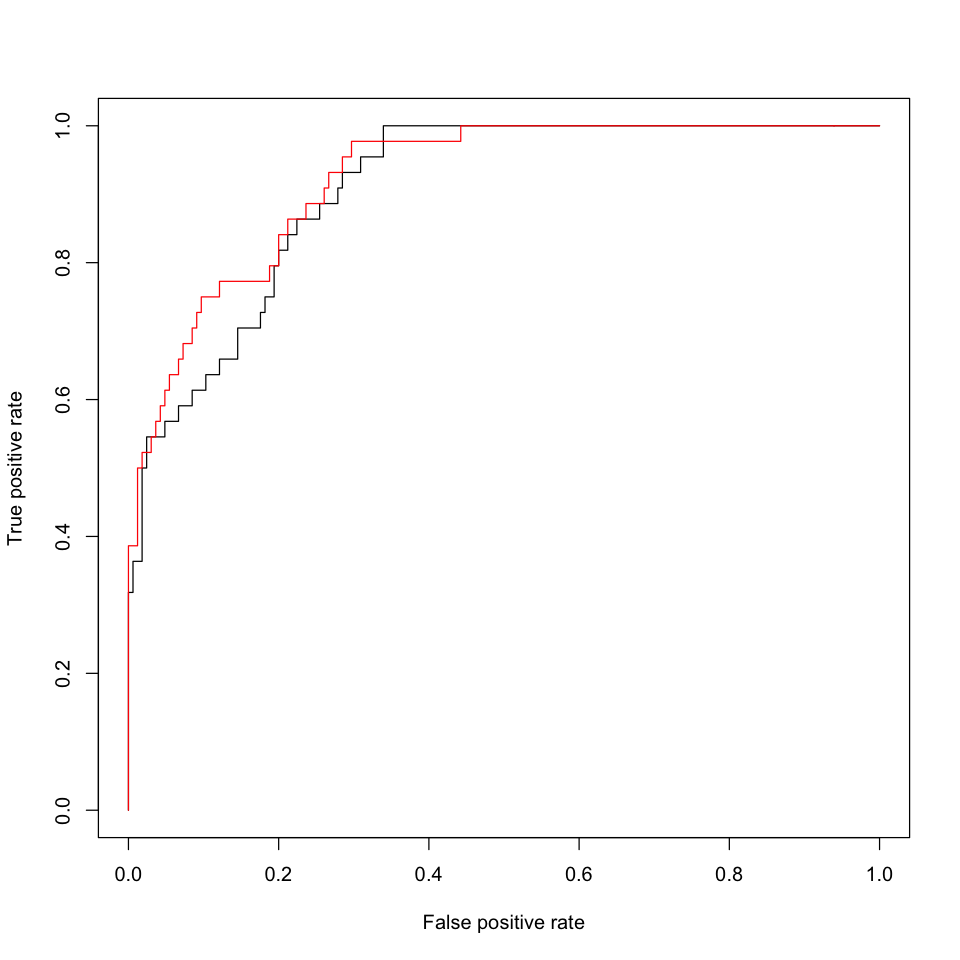

In [84]:
roclogit <- predict(log.qm.step1, newdata = datestq, type="response")
predlogit <- prediction(roclogit, datestq[, "DepSeuil"])
perflogit <- performance(predlogit, "tpr", "fpr")
# Tracé de la courbe
plot(perflogit, col = 1)
# Calculs pour la régression
rocglm <- pred.glm / 300
predglm <- prediction(rocglm, datestq[, "DepSeuil"])
perfglm <- performance(predglm, "tpr", "fpr")
# tracé de la courbe et ajout au graphe précédent.
plot(perfglm, col = 2, add = TRUE)

**Q** Que sont sensibilité et spécificité d'une courbe ROC?

<font color='blue'> La courbe ROC est une mesure de la performance d'un classificateur binaire, c'est-à-dire d'un système qui a pour objectif de catégoriser des éléments en deux groupes distincts sur la base d'une ou plusieurs des caractéristiques de chacun de ces éléments. Graphiquement, on représente souvent la mesure ROC sous la forme d'une courbe qui donne le taux de vrais positifs (fraction des positifs qui sont effectivement détectés) en fonction du taux de faux positifs (fraction des négatifs qui sont incorrectement détectés).

La sensibilité est le taux de vrais positifs tandis que la spécificité est le taux de vrais négatifs</font>
    
Les résultats obtenus dépendent évidemment en plus de l'échantillonnage initial entre apprentissage et test. Dans le cas où les courbes se croisent, cela signifie qu'il n'y a pas de prévision uniformément meilleure de l'occurrence de dépassement. Cela dépend de la sensibilité ou de la spécificité retenue pour le modèle. Ceci souligne l'importance de la bonne définition du critère à utiliser pour le choix d'une "meilleure" méthode. Ce choix dépend directement de celui , "politique" ou "économique" de sensibilité et / ou spécificité du modèle retenu. En d'autres termes, quel taux de fausse alerte, avec des imputations économiques évidentes, est supportable au regard des dépassements non détectés et donc de la dégradation sanitaire de la population à risque ?
 
C'est une fois ce choix arrêté que le statisticien peut opérer une comparaison des méthodes en présence.

**Q** Les performances des deux approches gaussiennes et binomiales sont-elles très différentes?

<font color="blue">Les courbes se croisent ce qui signifie qu'il n'y a pas de prévision uniformément meilleur de l'occurence de dépassement. Les deux approches ne sont pas très différentes</font>

# <FONT COLOR="Red">TP 5</font> 

## Arbre de décision binaire

La librairie  `rpart` est celle la plus couramment utilisée pour la construction d'arbres de décision. Deux types d'arbre peuvent être estimer selon que la variable à modéliser est la concentration d'ozone (arbre de régression) ou directement le dépassement du seuil (arbre de discrimination ou de décision). Différents paramètres  contrôlent l'exécution de l'algorithme: la pénalisation  minimale (`cp`) pour la construction de l'arbre maximal, le nombre minimal d'observation par noeud, le nombre de validations croisées (par défaut 10)... cf. l'aide en ligne (?rpart.control) pour plus de détails mais celle-ci n'est pas très explicite sur certains paramètres, c'est le travers des logiciels "libres".

**NB.** Une séquence de valeurs de la pénalisation `cp` est associée à une séquence d'arbres emboîtés.


### Estimation et élagage de l'arbre de régression
**Q** Quel critère est optimisé lors de la création d'un noeud? de l'arbre?

<FONT COLOR="Blue">Lors de la création de l'arbre, on optimise le cout du chemin de la racine vers les feuilles. Il est préférables que la profondeur ne soit pas trop élévée et donc que le nombre de noeuds soit minimiser. Ainsi, lors de la création d'un noeud, il est possible de définir le nombre minimum de cas qui doivent découler de ce noeud. Cela permet de supprimer des cas de figures trop peu représentatifs pour se concentrer sur des résultats généralisables.

In [85]:
library(rpart) # chargement de la librairie
tree.reg=rpart(O3obs~.,data=datappr,control=rpart.control(cp=0.001))
# La commande ci-dessous fournit un descriptif de l'arbre obtenu
summary(tree.reg)  
# mais un graphe est  préférable

Call:
rpart(formula = O3obs ~ ., data = datappr, control = rpart.control(cp = 0.001))
  n= 832 

            CP nsplit rel error    xerror       xstd
1  0.295561507      0 1.0000000 1.0011593 0.06902209
2  0.129577868      1 0.7044385 0.7270559 0.05229345
3  0.036181442      2 0.5748606 0.6207640 0.03779255
4  0.031399600      3 0.5386792 0.5896719 0.03599611
5  0.031053573      4 0.5072796 0.5628578 0.03241040
6  0.018687228      5 0.4762260 0.5562432 0.03200411
7  0.013291593      6 0.4575388 0.5607503 0.03347953
8  0.010905823      7 0.4442472 0.5524192 0.03327035
9  0.009713967      8 0.4333414 0.5386151 0.03227322
10 0.009018856      9 0.4236274 0.5385471 0.03237285
11 0.007177020     10 0.4146085 0.5446844 0.03345003
12 0.007130909     11 0.4074315 0.5328202 0.03281087
13 0.006893857     12 0.4003006 0.5301813 0.03275855
14 0.005977283     13 0.3934068 0.5261537 0.03279010
15 0.005064488     14 0.3874295 0.5224990 0.03246858
16 0.004342351     16 0.3773005 0.5198345 0.03196147
17

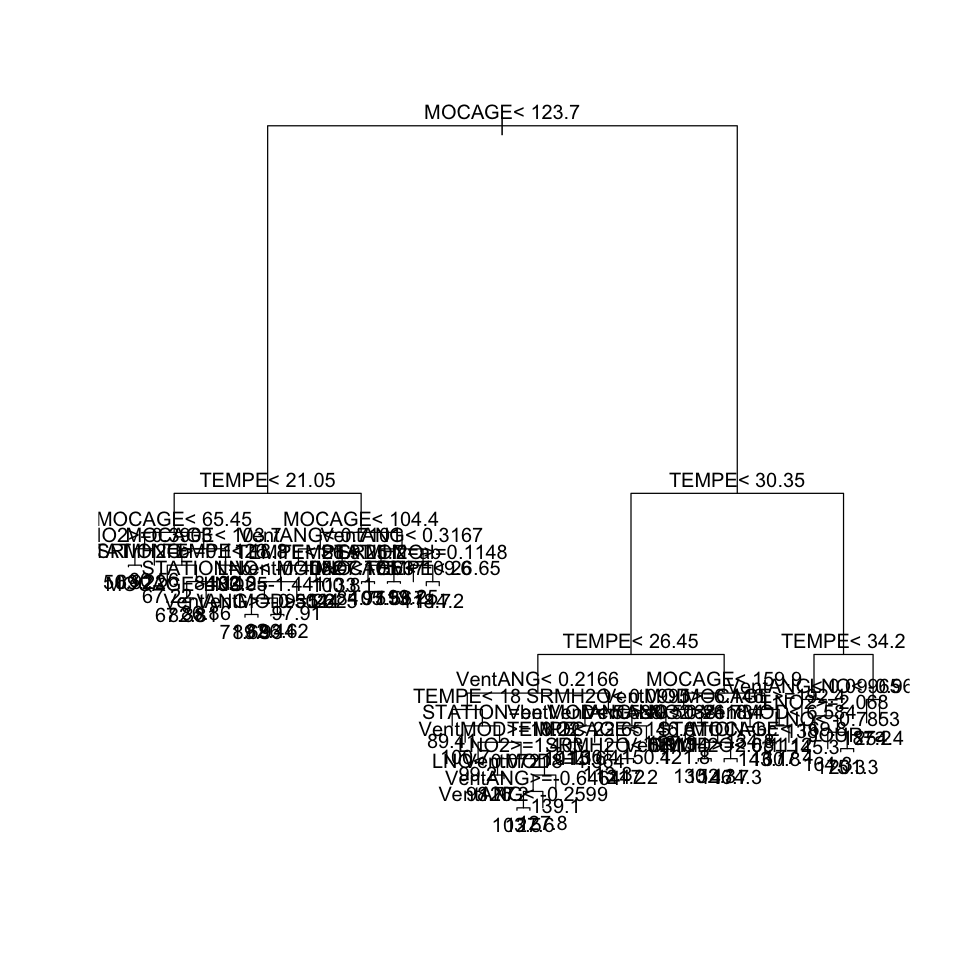

In [86]:
plot(tree.reg)
text(tree.reg)

L'arbre est illisible et présente trop de feuilles pour une bonne prévision (sur-apprentissage), il est nécessaire d'en réduire le nombre par élagage. Les commandes suivantes calculent les prévisions obtenues par  validation croisée *10-fold* pour chaque arbre élagué suivant les valeurs successives du coefficient de complexité. La séquence de ces valeurs est implicitement celle fournit par `rpart`. 

In [87]:
xmat=xpred.rpart(tree.reg)
xerr=(xmat-datappr[,"O3obs"])^2
CVerr=apply(xerr,2,sum)
CVerr  #    CP           erreur

0.647780753 0.195699336 0.068471265 0.033705827 0.031226107 0.024089524 
  1366127.6    979920.2    843009.5    813489.6    774586.1    735908.0 
0.015760172 0.012039757 0.010292658 0.009359961 0.008045403 0.007153927 
   719252.7    725797.1    721684.5    724288.2    724934.9    712491.5 
0.007011381 0.006419232 0.005501988 0.004689540 0.004257638 0.004163285 
   709953.1    708942.9    701117.5    713817.5    714227.5    713681.2 
0.004069034 0.003932711 0.003819614 0.003728972 0.003618204 0.003377124 
   715342.3    716503.3    716765.1    715815.6    711776.0    716970.4 
0.003211632 0.003147809 0.002976777 0.002847325 0.002745533 0.002645498 
   721016.6    727163.8    734632.6    737691.8    737066.8    737308.6 
0.002552392 0.002477944 0.002449890 0.002358546 0.002249134 0.002093837 
   738264.4    736617.9    736148.6    731748.5    728980.2    728977.9 
0.001945615 0.001838697 0.001680111 0.001577115 0.001517606 0.001435031 
   727883.7    727701.2    733700.3    738787.8    737061.2    736498.9 
0.001351654 0.001293376 0.001253506 0.001138011 0.001042467 0.001014201 
   736984.8    738121.5    740405.7    741506.1    739638.5    740770.4

Chercher la valeur de `cp` correspondant à la plus petite erreur puis l'utiliser la construction del'arbre.

In [88]:
as.numeric(attributes(which.min(CVerr))$names)

[1] 0.005501988

In [89]:
tree.reg=rpart(O3obs~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))

La librairie `partykit` propose une construction graphique de l'arbre:

In [90]:
install.packages("partykit")


The downloaded binary packages are in
	/var/folders/v6/tzh3d58j3q79tqlj3n83vwnr0000gn/T//RtmpaeeuaP/downloaded_packages


Warning message:
“package ‘partykit’ was built under R version 3.6.2”
Loading required package: grid

Loading required package: libcoin

Warning message:
“package ‘libcoin’ was built under R version 3.6.2”
Loading required package: mvtnorm

Warning message:
“package ‘mvtnorm’ was built under R version 3.6.2”


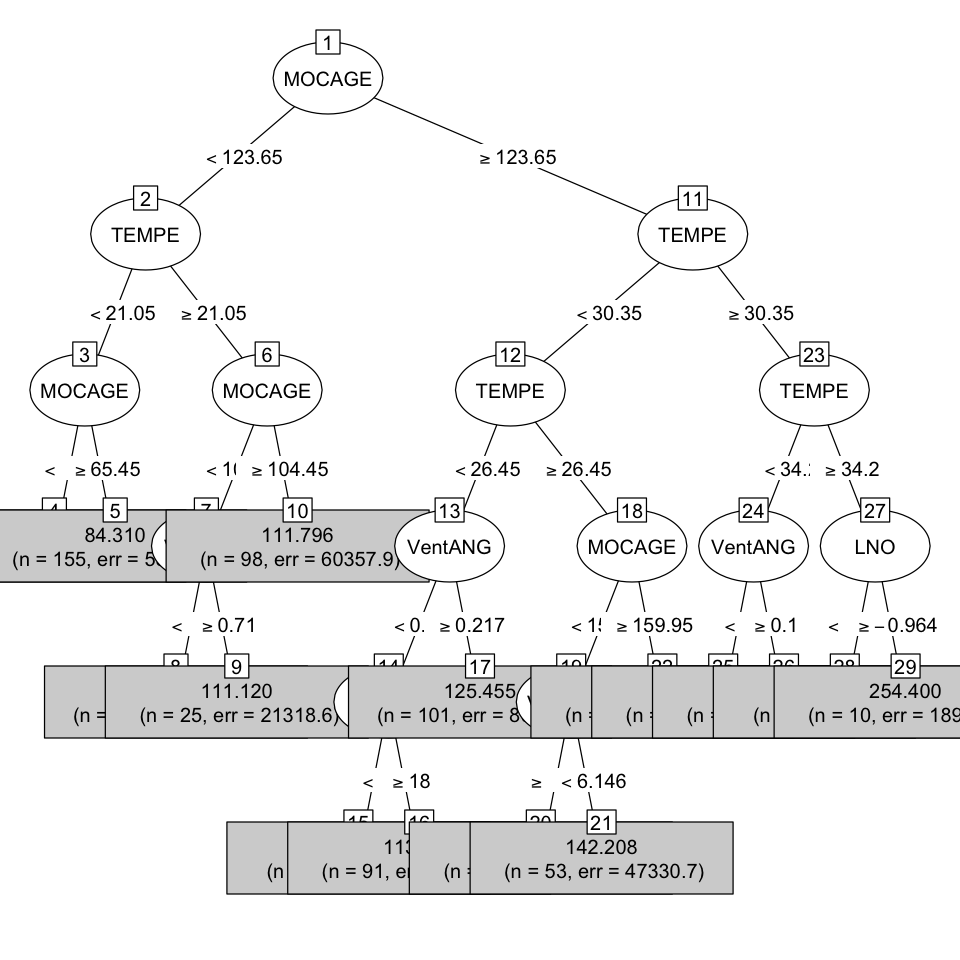

In [91]:
library(partykit)
plot(as.party(tree.reg), type="simple")

La fenêtre est trop petite pour représenter les distributions (histogramme) de la variable cible (concentration en ozone) dans chaque feuille. 

**Q** Quelle est la variable qui contribue le plus à l'interprétation?
<FONT COLOR="Blue"> La variable qui contribue le plus à l'interprétation est celle qui a l'entropie la plus importante. Cette variable est donc mise à la racine de l'arbre. Ici, c'est la variable MOCAGE.
Graphe des résidus

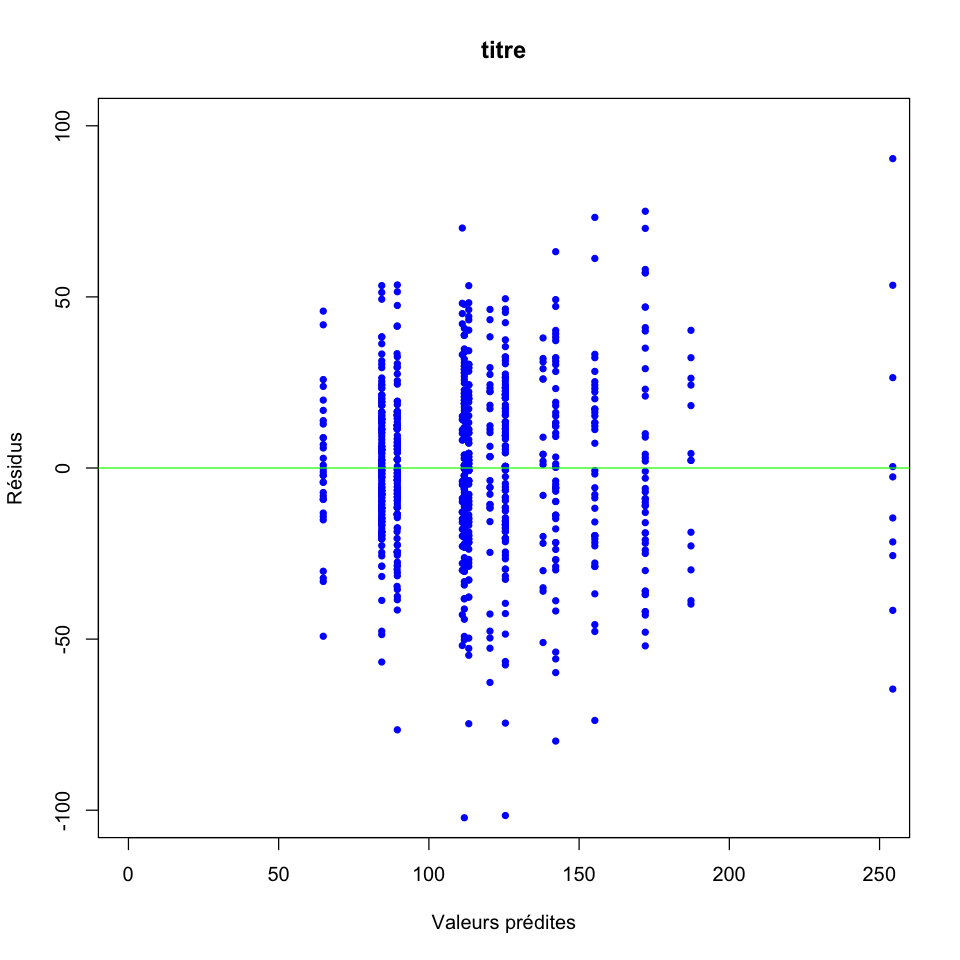

In [92]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"O3obs"]
plot.res(fit.tree,res.tree)

**Q** A quoi est due la structure particulière de ce graphe?

<FONT COLOR="Blue">Ce graphe à une structure particulière car les données ne sont pas distribuées de façon uniforme et leurs distribution ne suivent pas une loi normale (comme observé précédemment)
    </font>
### Estimation et élagage d'un arbre de discrimination
Dans le cas d'une discrimination, le critère par défaut est l'indice de concentration de Gini ; il est possible de préciser un autre critère (split="information") ainsi que des poids sur les observations, une matrice de coûts de mauvais classement ainsi que des probabilités *a priori* (?rpart pour plus de détails).

**Q** Quel autre critère d'hétérogénéité est utilisé?
<FONT COLOR="Blue">
Le poid des observations dans la décision

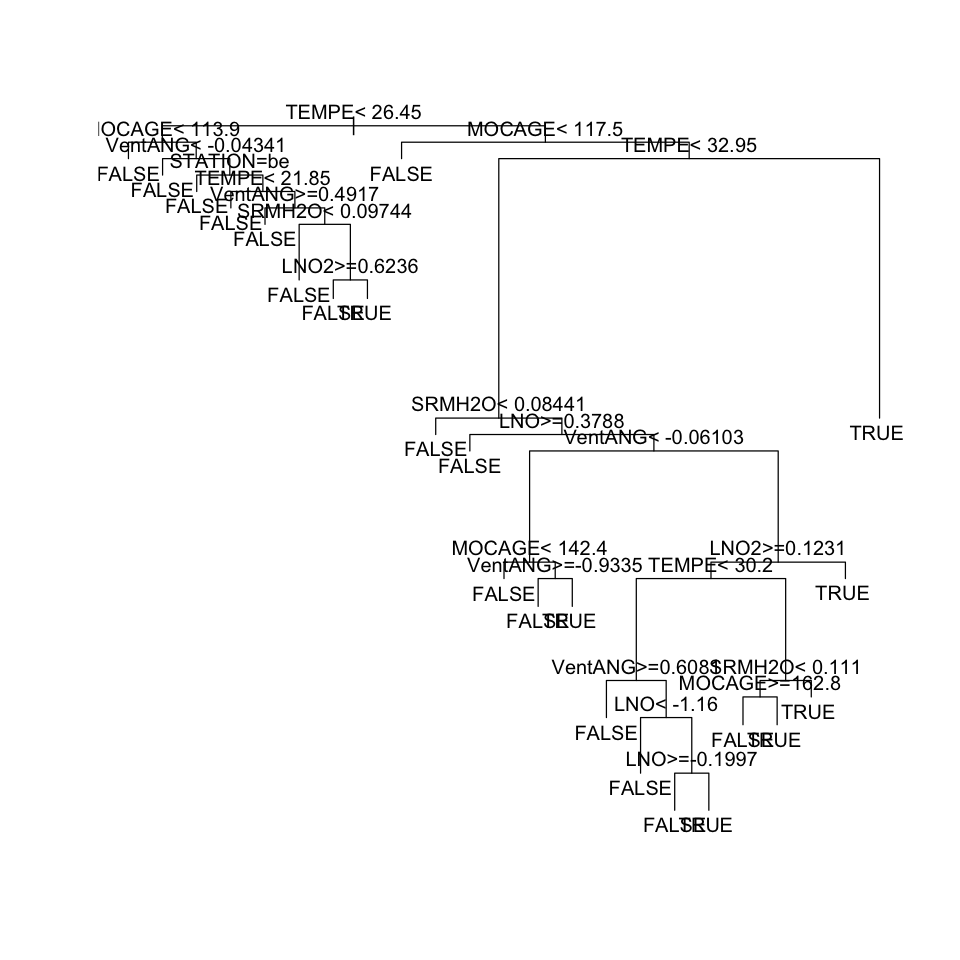

In [93]:
tree.dis=rpart(DepSeuil~.,data=datappq,parms=list(split="information"),cp=0.001)
plot(tree.dis) 
text(tree.dis)  

La même procédure d'élagage par validation croisée est mise en place mais avec un expression différente de l'erreur de prévision: taux de mal classés plutôt qu'erreur quadratique.

In [94]:
xmat = xpred.rpart(tree.dis)
# Comparaison des valeurs prédite et observée
xerr=datappq$DepSeuil!= (xmat>1.5) 
# Calcul  des estimations des taux d'erreur
CVerr=apply(xerr, 2, sum)/nrow(xerr)
CVerr

0.534825871 0.045597768 0.018279774 0.009139887 0.002731792 
  0.1610577   0.1406250   0.1406250   0.1502404   0.1634615

In [95]:
as.numeric(attributes(which.min(CVerr))$names)

[1] 0.04559777

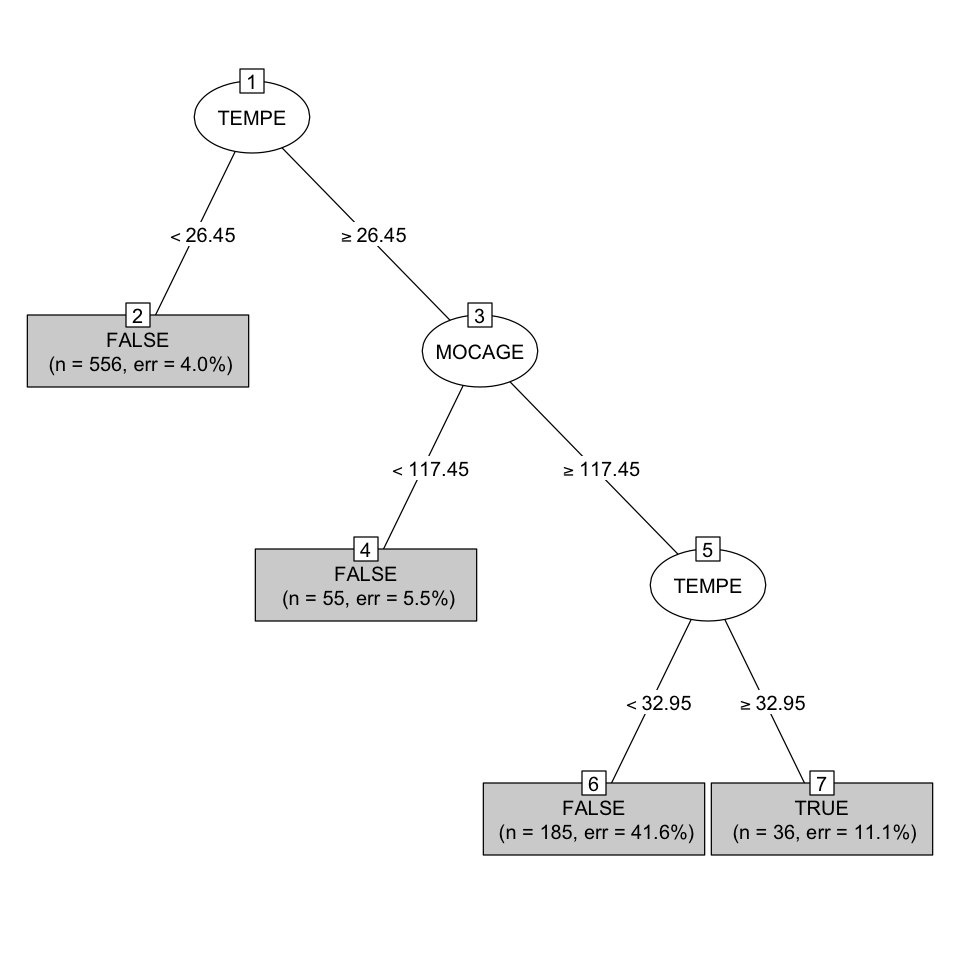

In [96]:
tree.dis=rpart(DepSeuil~.,data=datappq,parms=list(split="information"),
               cp=as.numeric(attributes(which.min(CVerr))$names))
plot(as.party(tree.dis), type="simple")

### Prévision de l'échantillon test
Différentes prévisions sont considérées assorties des erreurs estimées sur l'échantillon test. Prévision quantitative de la concentration, prévision de dépassement à partir de la prévision quantitative et directement la prévision de dépassement à partir de l'arbre de décision. 

In [97]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
pred.treeq=predict(tree.dis,newdata=datestq,type="class") 
# Erreur quadratique moyenne de prévision en régression
sum((pred.treer-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 889.8637

In [98]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil (régression)
table(pred.treer>150,datestr[,"O3obs"]>150)

       
        FALSE TRUE
  FALSE   155   22
  TRUE     10   22

In [99]:
# Même chose pour l'arbre de discrimination
table(pred.treeq,datestq[,"DepSeuil"])

          
pred.treeq FALSE TRUE
     FALSE   165   37
     TRUE      0    7

**Q** Quelle stratégie semble meilleure à ce niveau?

<FONT COLOR="Blue">La matrice de confusion pour la prévision du dépassement de seuil montre 32 mal classés comparé à 37 pour l'abre de discrimination. On peut donc penser que la régression est la meilleure stratégie. Cependant, la discrimination ne donne aucun faux positifs ce qui peut changer la donne.</font>
### Courbes ROC

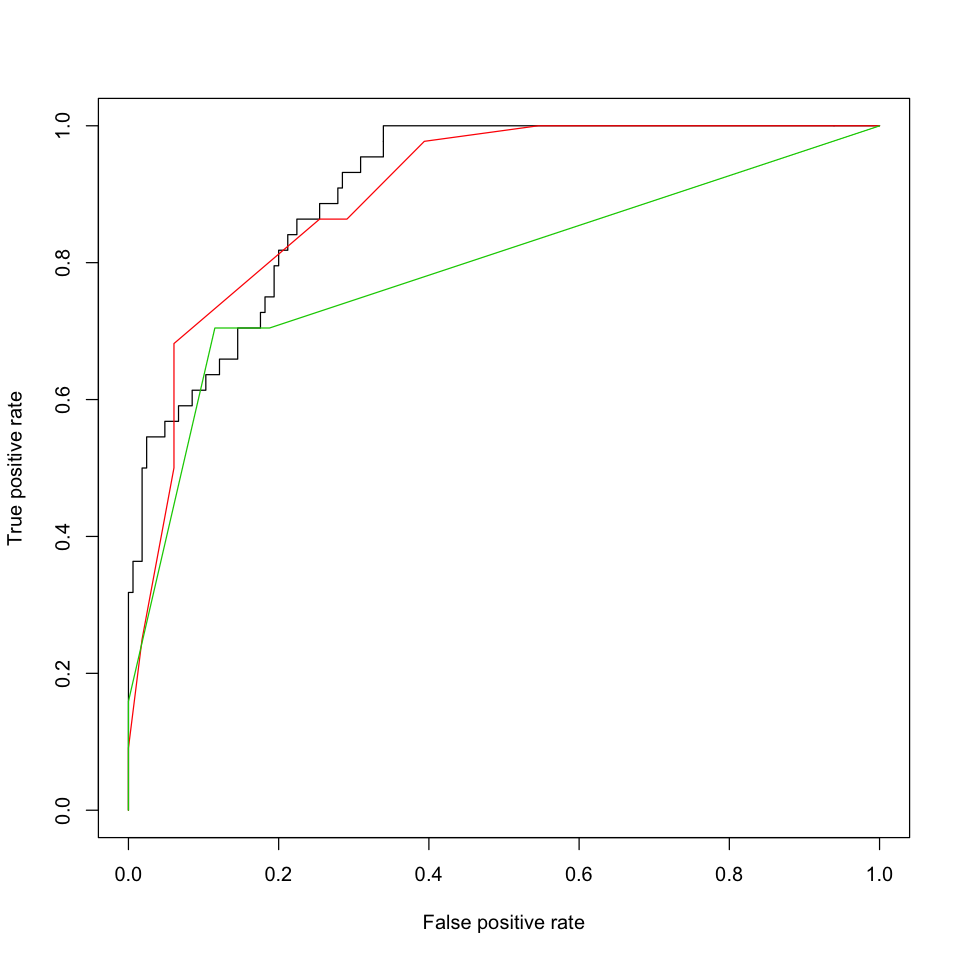

In [100]:
ROCregtree=pred.treer/300
predregtree=prediction(ROCregtree,datestq$DepSeuil)
perfregtree=performance(predregtree,"tpr","fpr")
ROCdistree=predict(tree.dis,newdata=datestq,type="prob")[,2]
preddistree=prediction(ROCdistree,datestq$DepSeuil)
perfdistree=performance(preddistree,"tpr","fpr")
# tracer les courbes ROC en les superposant 
# pour mieux comparer
plot(perflogit,col=1)
plot(perfregtree,col=2,add=TRUE) 
plot(perfdistree,col=3,add=TRUE)  

Comparer les qualités  de prévision.

**Q** Une meilleure méthode se dégage-t-elle?
<font color="blue">On observe que l'arbre de discrimination est le moins performant. Les deux autres méthodes se "valent". On ne peut pas conclure clairement.</font>

## Arbre sur données du cours 

In [101]:
df <- read.csv(file = "ex1.csv",sep = ",", dec = ";", colClasses = c("character","character","character","character","character"))

In [102]:
df

Meteo  Amis     Vent   Jour    Decision
1 soleil présents faible WE      oui     
2 soleil absents  fort   semaine non     
3 soleil présents fort   semaine non     
4 soleil absents  faible semaine oui     
5 nuages absents  faible WE      non     
6 nuages présents fort   WE      non     
7 nuages absents  fort   semaine non     
8 nuages présents faible WE      oui     
9 soleil absents  faible WE      non

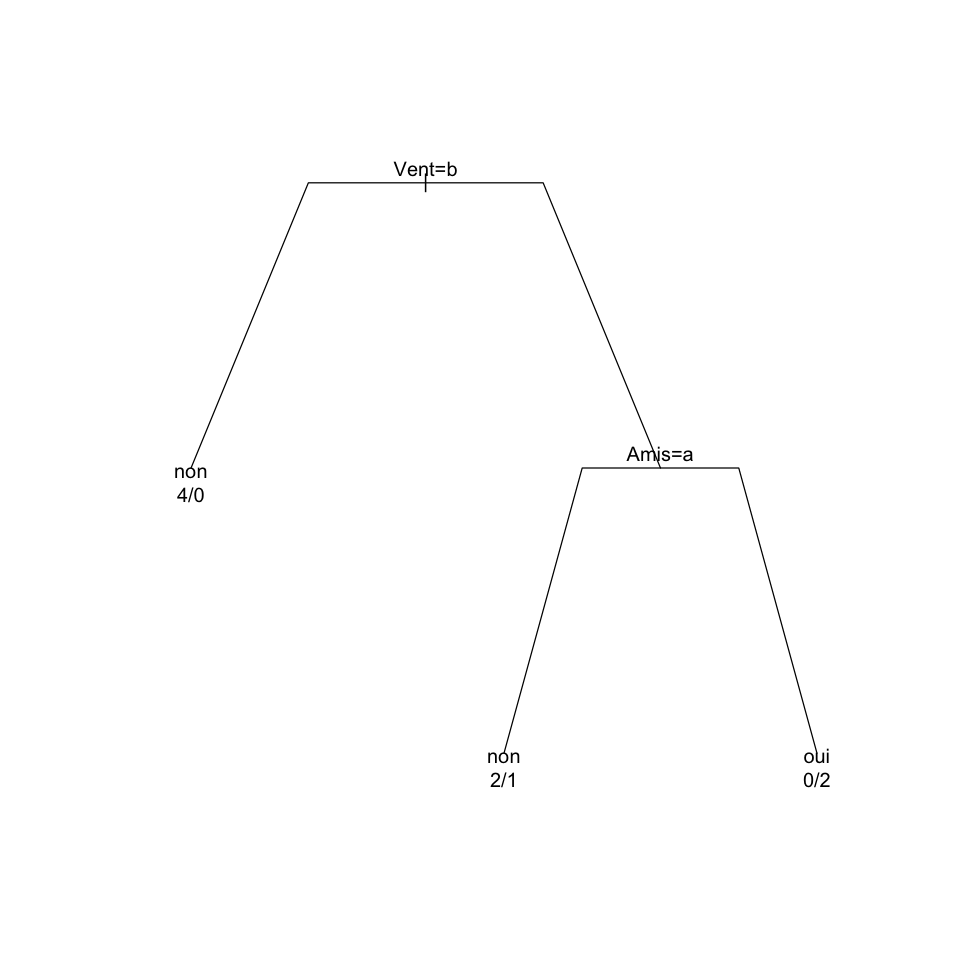

In [103]:
df.Tree <- rpart(Decision~.,data=df, control=rpart.control(minsplit=5,cp=0))

#Affichage du résultat
plot(df.Tree, uniform=TRUE, branch=0.5, margin=0.1)
text(df.Tree, all=FALSE, use.n=TRUE)



In [104]:
library(rpart.plot)

Warning message:
“package ‘rpart.plot’ was built under R version 3.6.2”


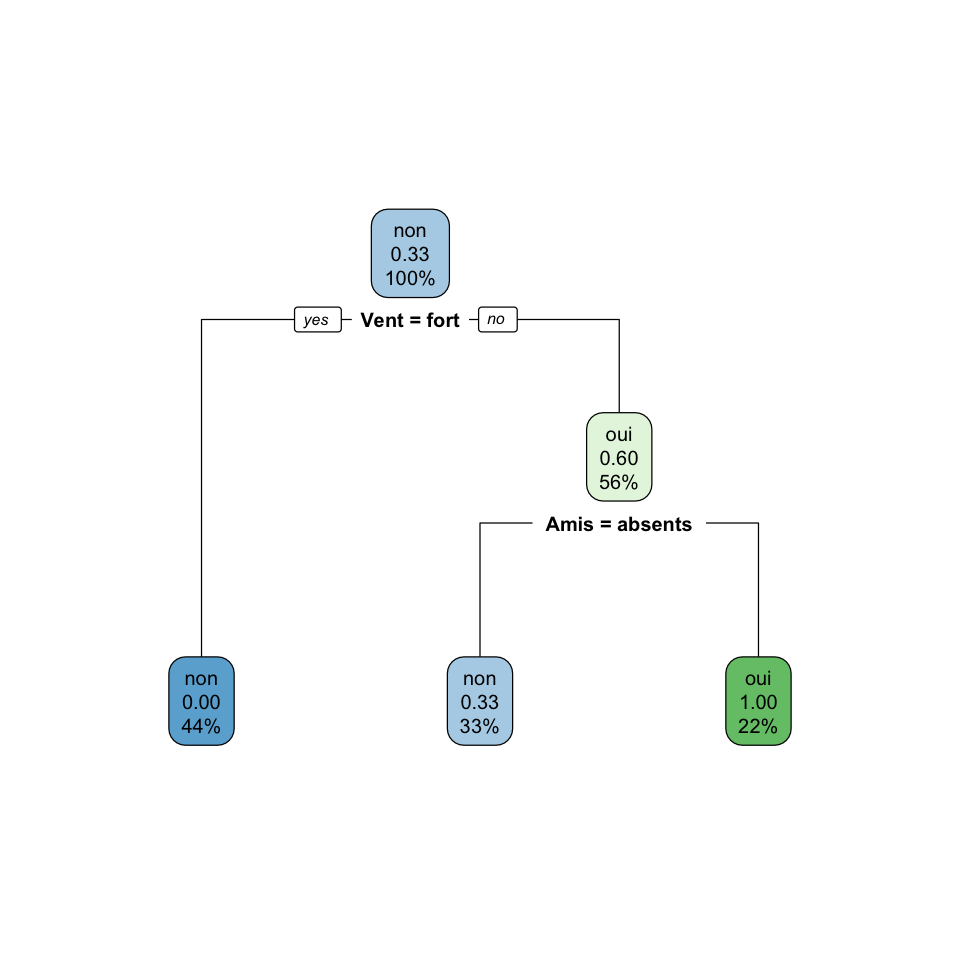

In [105]:
rpart.plot(df.Tree)

In [106]:
summary(df.Tree)

Call:
rpart(formula = Decision ~ ., data = df, control = rpart.control(minsplit = 5, 
    cp = 0))
  n= 9 

         CP nsplit rel error   xerror      xstd
1 0.3333333      0 1.0000000 1.000000 0.4714045
2 0.0000000      2 0.3333333 1.666667 0.4969040

Variable importance
Vent Amis Jour 
  46   31   23 

Node number 1: 9 observations,    complexity param=0.3333333
  predicted class=non  expected loss=0.3333333  P(node) =1
    class counts:     6     3
   probabilities: 0.667 0.333 
  left son=2 (4 obs) right son=3 (5 obs)
  Primary splits:
      Vent  splits as  RL, improve=1.6, (0 missing)
      Amis  splits as  LR, improve=0.4, (0 missing)
      Meteo splits as  LR, improve=0.1, (0 missing)
      Jour  splits as  LR, improve=0.1, (0 missing)
  Surrogate splits:
      Jour splits as  LR, agree=0.778, adj=0.5, (0 split)

Node number 2: 4 observations
  predicted class=non  expected loss=0  P(node) =0.4444444
    class counts:     4     0
   probabilities: 1.000 0.000 

Node number 3: 5

<font color=blue>Pour le deuxième jeu de données, afin de mieux comprendre l'arbre obtenu, on modifie les avleurs des variables par 1 ou 0. Avec l'explication suivant :
    
    - soleil=1 et nuages=0
    
    - fort =1 et faible=0
    
    - WE=1 et semaine=0
    
    - oui=1 et non =0
</font>

In [107]:
df1 <- read.csv(file = "ex2.csv",sep = ",", dec = ";", colClasses = c("character","character","character","character","character"))

In [108]:
df1

Meteo Amis Vent Jour Decision
1 1     1    1    1    0       
2 0     0    0    0    0       
3 1     0    0    1    1       
4 1     0    0    0    0       
5 0     1    0    0    1

In [109]:
df1.Tree <- rpart(Decision~.,data=df1, control=rpart.control())
summary(df1.Tree)


Call:
rpart(formula = Decision ~ ., data = df1, control = rpart.control())
  n= 5 

    CP nsplit rel error xerror xstd
1 0.01      0         1      0    0

Node number 1: 5 observations
  predicted class=0  expected loss=0.4  P(node) =1
    class counts:     3     2
   probabilities: 0.600 0.400 



In [110]:
library(rpart.plot)

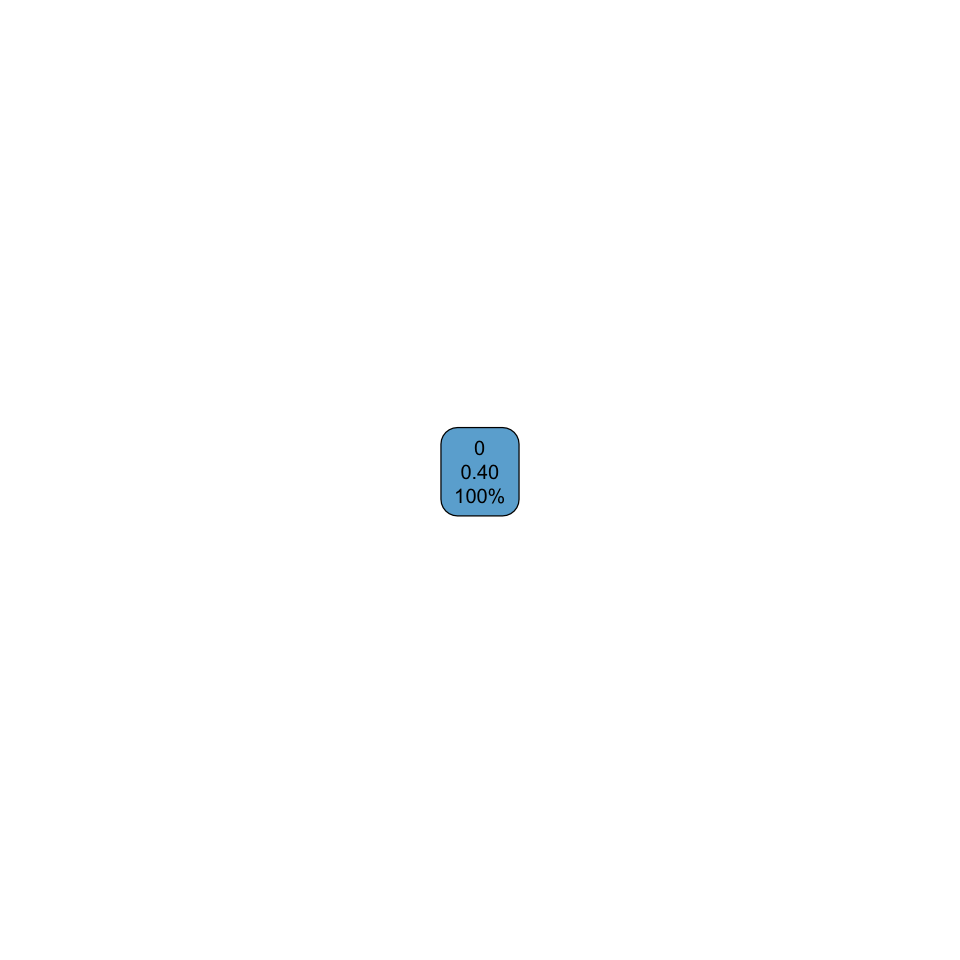

In [111]:
rpart.plot(df1.Tree)

# <FONT COLOR="Red">TP 6</font>

## [Réseau de neurones](http://wikistat.fr/pdf/st-m-app-rn.pdf)

### Introduction
Il s'agit d'estimer un modèle de type *perceptron* avec en entrée les variables qualitatives ou quantitatives et en sortie la variable à prévoir. Des fonctions R pour l'apprentissage d'un perceptron élémentaire ont été réalisées par différents auteurs et sont accessibles sur le réseau. La librairie `nnet` de (Ripley, 1999), est limitée au perceptron à une couche. Ce n'est pas de l'*apprentissage profond* ! mais suffisant dans bien des cas. Une librairie R associée au logiciel éponyme H2O propose des réseaux à plusieurs couches et "convolutionnels".

Comme pour les arbres, la variable à expliquer est soit quantitative soit qualitative ; la fonction de transfert du neurone de sortie d'un réseau doit être adaptée en conséquence. 

**Q** Quelle fonction de transfert pour le dernier neurone en régression ?
<font color="blue">De façon usuelle et en régression (Y quantitative), la dernière couche est constituée d’un seul neurone muni de la fonction d’activation identité tandis que les autres neurones (couche cachée) sont munis de la fonction sigmoïde.  La fonction identité f(x)=x est définie sur R et son ensemble image est R. </font>


**Q** Quelle fonction de transfert pour le dernier neuronne en discrimination binaire?
<font color="blue"> En discrimination (classification en anglais) binaire, le neurone de sortie est muni de la fonction $sigmoïde$.

Une fonction sigmoïde est une fonction mathématique qui a une courbe caractéristique en forme de S. Il existe un certain nombre de fonctions sigmoïdes communes, telles que la fonction logistique, la tangente hyperbolique et l'arctangente.
En machine learning, le terme fonction sigmoïde est normalement utilisé pour désigner spécifiquement la fonction logistique, également appelée fonction logistique sigmoïde.
Toutes les fonctions sigmoïdes ont la propriété de représenter la ligne entière des nombres dans une petite plage, par exemple entre 0 et 1, ou -1 et 1. Une fonction sigmoïde sert donc à convertir une valeur réelle en une valeur qui peut être interprétée comme une probabilité.

La fonction sigmoïd est définie par : $$ f(x) = \frac{1}{1+e^{-x}}$$ 
</font>



**Q** Quid de la discrimination avec plusieurs classes?

<font color="blue">Dans le cas d'une discrimination à plusieurs classes (n classes par exemple), le neurone de sortie intègre une focntion d'activation $softmax$ à valeurs dans $R^n$ et de somme unit. Ces $n$ valeurs sont assimilables à des probabilités d'appartenance à une classe.

La fonction softmax est une fonction qui transforme un vecteur de $K$ valeurs réelles en un vecteur de $K$ valeurs réelles dont la somme est égale à 1. Les valeurs d'entrée peuvent être positives, négatives, nulles ou supérieures à un, mais la softmax les transforme en valeurs comprises entre 0 et 1, de sorte qu'elles puissent être interprétées comme des probabilités. Si l'une des entrées est petite ou négative, la softmax la transforme en une petite probabilité, et si une entrée est grande, alors elle la transforme en une grande probabilité, mais elle restera toujours entre 0 et 1.

De nombreux réseaux neuronaux multicouches se terminent par une avant-dernière couche qui produit des scores à valeur réelle qui ne sont pas facilement mis à l'échelle et qui peuvent être difficiles à utiliser. Ici, le softmax est très utile car il convertit les scores en une distribution de probabilité normalisée, qui peut être affichée à l'utilisateur ou utilisée comme entrée dans d'autres systèmes. Pour cette raison, il est habituel d'ajouter une fonction softmax comme couche finale du réseau neuronal.
    
La fonction softmax est définie par : $$\sigma(z)_j = \frac{e^{zj}}{\sum_{k=1}^K e^{zk}} $$
 pour tout $j \in {1,...,K}$

</font>


**Q** Quel est le choix par défaut pour les neurones de la couche cachée?

<font color="blue">Par défaut, les neurones de la couche cachée sont munis de la fonction $sigmoïde$</font>



Différentes stratégies sont proposées pour éviter le sur-apprentissage. La première conciste à optimiser le nombre de neurones sur la couche cachée. Très approximativement il est d'usage de considérer, qu'en moyenne, il faut une taille d'échantillon d'apprentissage 10 fois supérieure au nombre de poids c'est-à-dire au nombre de paramètres à estimer. On remarque qu'ici la taille de l'échantillon d'apprentissage (832) est modeste pour une application raisonnable du perceptron. Seuls des nombres restreints de neurones peuvent être considérés et sur une seule couche cachée. 

**Q** Quel est le paramètre `decay` de la fonction `nnet`?

<font color="blue"> Le paramètre `decay` de la fonction `nnet` permet la régularisation. Par défaut il est à 0 ce qui signifie qu'il n'y a pas de régularisation. Plus la valeur du paramètre `decay` est importante, moins les poids des entrées des neurones peuvent prendre des valeurs chaotiques contribuant ainsi à limiter les risques de sur-apprentissage. Cette méthode de régularisation consiste à ajouter une pénalité à la fonction d'erreur qui dépend de la magnitude des poids qui relient les neurones entre eux. </font>

**Q** Indiquer une autre façon déviter le sur-apprentissage.

<font color="blue">Afin d'éviter le sur-apprentissage, en plus du paramètre `decay`, il est possible de limiter le nombre de neurones ou la durée d'apprentissage. La stratègie qui combine simplicité et efficacité consiste à introduire un grand nombre de neurones puis à optimiser le paramètre de régularisation `decay` par validation croisée. </font>

<font color="blue">Les réseaux de neurones sont des boîtes noires, c'est à dire qu'on ne peut pas réellement expliquer comment ils trouvent le résultat prédit. Pour les évaluer, il est donc d'usage de faire une étude des erreurs de prévisions ou une étude des résidus dans le cas d'une regression. C'est ce que nous faisons par la suite. </font>

### Cas de la régression

In [112]:
library(MASS)
library(nnet)
# apprentissage
# attention au paramètre linout dans le cas de la régression
nnet.reg=nnet(O3obs~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

# weights:  71
initial  value 12419085.309629 
iter  10 value 1275606.257859
iter  20 value 1087875.097295
iter  30 value 900834.350717
iter  40 value 801118.579768
iter  50 value 762772.727194
iter  60 value 719538.131275
iter  70 value 674090.471234
iter  80 value 657812.051811
iter  90 value 643433.597059
iter 100 value 624665.176161
iter 110 value 606620.196243
iter 120 value 585012.746091
iter 130 value 573206.980852
iter 140 value 564660.459814
iter 150 value 558707.637372
iter 160 value 553463.916948
iter 170 value 542790.893791
iter 180 value 534290.798399
iter 190 value 525971.950725
iter 200 value 515752.453075
iter 210 value 503164.182467
iter 220 value 492940.541901
iter 230 value 483168.144086
iter 240 value 473748.930100
iter 250 value 471197.233181
iter 260 value 469649.151383
iter 270 value 469593.923378
iter 280 value 469591.360999
final  value 469591.201239 
converged


a 12-5-1 network with 71 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -5.41   18.46   -0.13   -0.58    5.35   -1.25    7.87    0.24   -0.35   -0.66 
i10->h1 i11->h1 i12->h1 
   8.10   21.21  -17.56 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
 -16.87    3.87    1.15   -4.45   -5.55   13.06    6.55   -0.71    1.26   -8.55 
i10->h2 i11->h2 i12->h2 
   8.27   -1.58   16.92 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -1.09    1.74    0.04    0.18   -0.80   -0.25    2.18   -0.60   -0.37    0.63 
i10->h3 i11->h3 i12->h3 
 -36.71   -0.79    0.61 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4  i7->h4  i8->h4  i9->h4 
  23.22   -5.74   -0.01   -0.38   -4.45   -1.98   -3.22    4.47    1.12   -0.34 
i10->h4 i11->h4 i12->h4 
 -62.31   -1.27    0.70 
  b->h5  i1->h5  i2->h5  i3->h5  i4->h5  i5->h5  i6->h5  i7->h5  i8->h5  i9

La commande donne la "trace" de l'exécution avec le comportement de la convergence mais le détail des poids de chaque entrée de chaque neurone ne constituent pas des résultats très explicites ! Contrôler le nombre de poids estimés.

L'optimisation des paramètres nécessite encore le passage par la validation croisée. Il n'y a pas de fonction dans la librairie `nnet` permettant de le faire mais la fonction ` tune.nnet` de la librairie `e1071` est adaptée à cette démarche.

In [113]:
#install.packages("e1071")  

Warning message:
“package ‘e1071’ was built under R version 3.6.2”


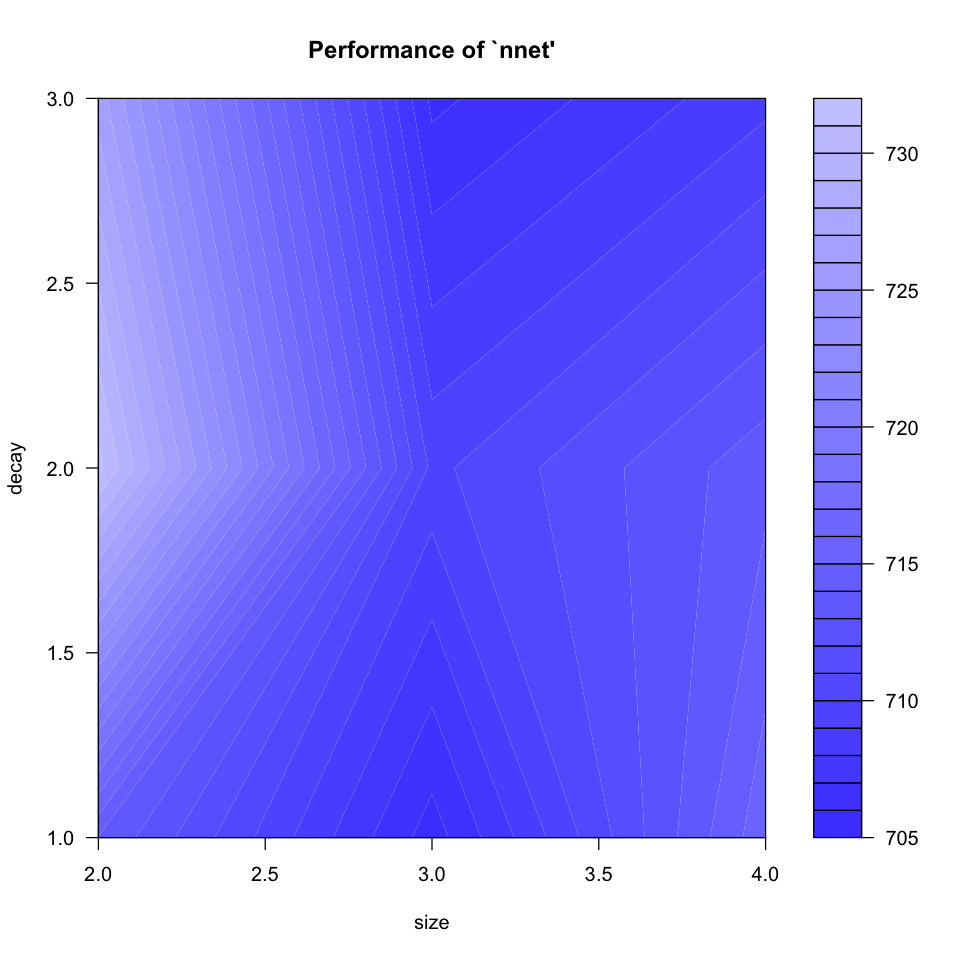

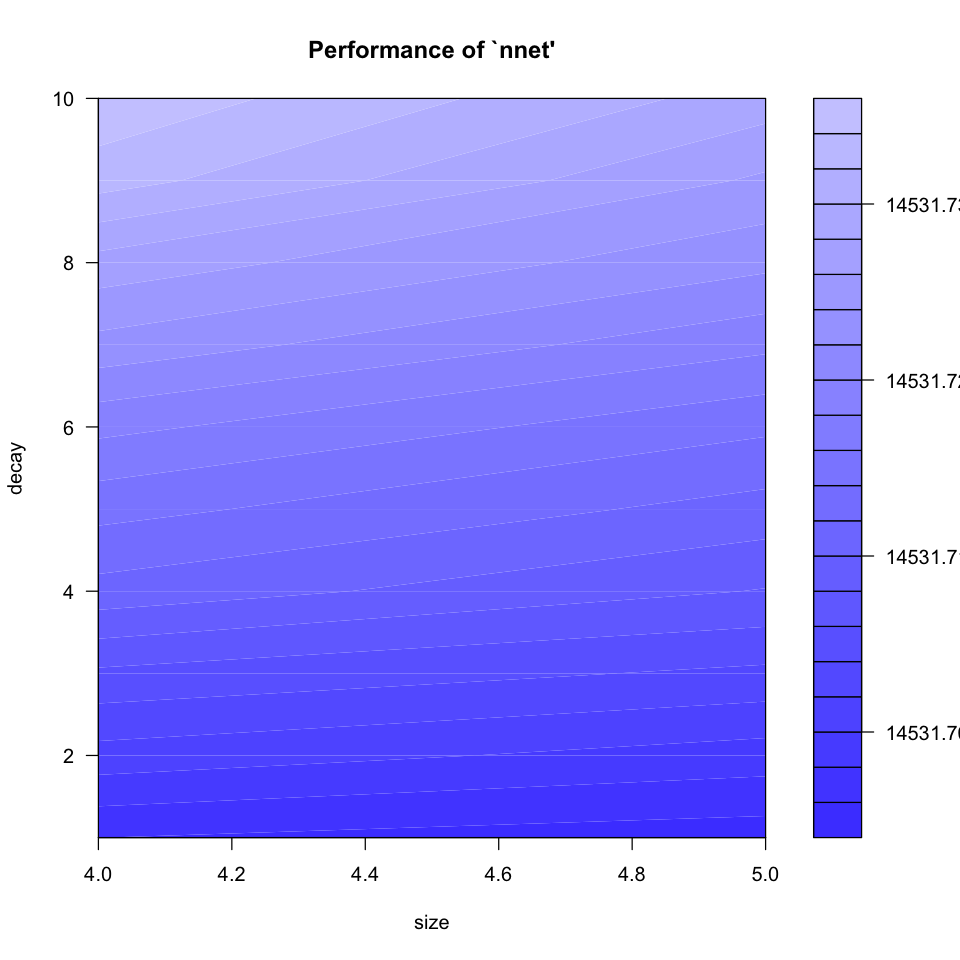

In [114]:
library(e1071)
plot(tune.nnet(O3obs~.,data=datappr,size=c(2,3,4),decay=c(1,2,3),maxit=200,linout=TRUE))
plot(tune.nnet(O3obs~.,data=datappr,size=4:5,decay=1:10))

Faire éventuellement varier la grille des paramètres (zoom), noter la taille et le `decay` optimaux. Il faudrait aussi  faire varier le nombre total d'itérations. Cela risque de prendre un peu de temps ! Noter également que chaque exécution donne des résultats différents... il n'est donc pas très utile d'y passer beaucoup de temps !

Ré-estimer le modèle supposé optimal avant de tracer le graphe des résidus. 

# weights:  43
initial  value 12250199.688906 
iter  10 value 1281140.468456
iter  20 value 1250492.813171
iter  30 value 691909.991883
iter  40 value 647461.316934
iter  50 value 639938.141182
iter  60 value 633702.425826
iter  70 value 627589.234353
iter  80 value 610563.530719
iter  90 value 559640.573753
iter 100 value 550038.451038
iter 110 value 547147.465806
iter 120 value 543903.395891
iter 130 value 543786.951366
iter 140 value 543767.837545
iter 150 value 543304.276636
iter 160 value 542641.610740
iter 170 value 540401.688446
iter 180 value 540093.897915
final  value 540093.824434 
converged


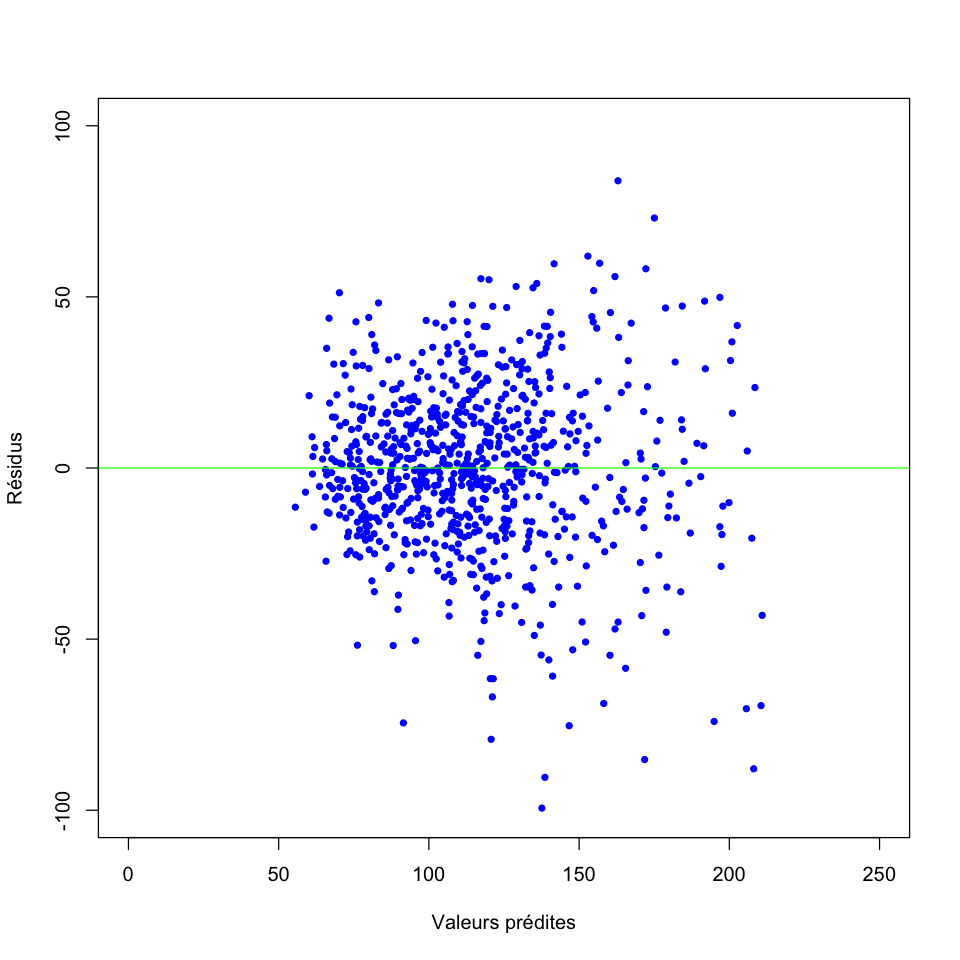

In [115]:
nnet.reg=nnet(O3obs~.,data=datappr,size=3,decay=2,linout=TRUE,maxit=200)
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"O3obs"]
plot.res(fit.nnetr,res.nnetr,titre="")

<font color="blue"> La visualisation des résidus montre que le problème de non-linéarité sur les modèles MOCAGE et regression linéaire est bien résolu et que les résidus sont moins étendus. Cependant, le phénomène d'hétéroscédasticité est toujours présent.</font>

### Cas de la discrimination

In [116]:
# apprentissage
nnet.dis=nnet(DepSeuil~.,data=datappq,size=5,decay=0) 
summary(nnet.reg)

# weights:  71
initial  value 811.296100 
iter  10 value 366.453547
iter  20 value 365.432486
final  value 365.431996 
converged


a 12-3-1 network with 43 weights
options were - linear output units  decay=2
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -1.07    0.11    0.02    0.16   -1.41    0.77    0.36    0.00   -0.11    0.38 
i10->h1 i11->h1 i12->h1 
 -20.05   -1.00    0.62 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  12.01   -1.03    0.18   -0.72   11.62   -3.18   17.58   -2.18   -0.19   -1.69 
i10->h2 i11->h2 i12->h2 
   2.62   -5.25    7.11 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
 -13.45    0.03    0.00    0.39    0.39    0.98    1.74   -0.30   -0.11    0.17 
i10->h3 i11->h3 i12->h3 
  25.77   -0.55    0.84 
  b->o  h1->o  h2->o  h3->o 
 22.68  66.36  33.21  96.60 

La validation croisée est toujours nécessaire afin de tenter d'optimiser les choix en présence : nombre de neurones, `decay` et éventuellement le nombre max d'itérations. 

L'initialisation de l'apprentissage d'un réseau de neurone comme celle de l'estimation de l'erreur par validation croisée sont aléatoires. Chaque exécution donne donc des résultats différents. À ce niveau, il serait intéressant de construire un plan d'expérience à deux facteurs (ici, les paramètres de taille et `decay`) de chacun trois niveaux. Plusieurs réalisations pour chaque combinaison des niveaux suivies d'un test classique d'anova permettraient de se faire une idée plus juste de l'influence de ces facteurs sur l'erreur. 

Noter la taille et le `decay` optimaux et ré-estimer le modèle pour ces valeurs.

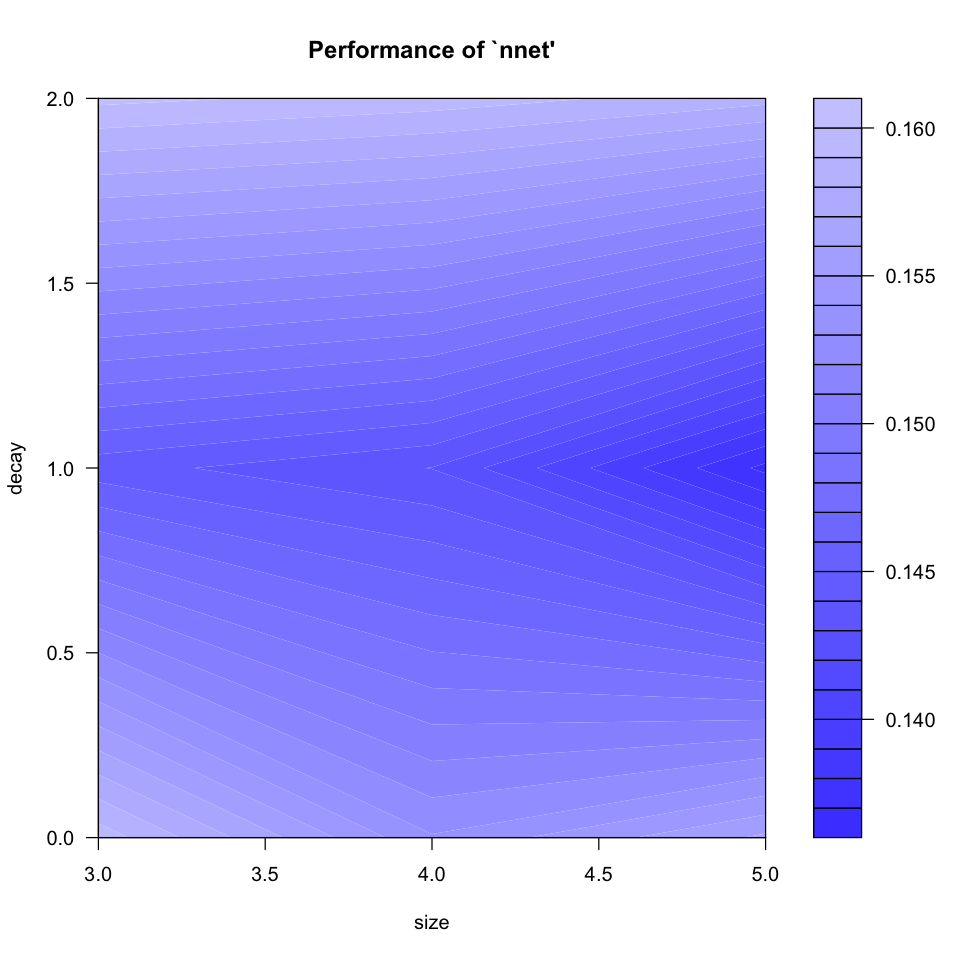

In [117]:
plot(tune.nnet(DepSeuil~.,data=datappq,size=c(3,4,5),decay=c(0,1,2),maxit=200,linout=FALSE))

In [118]:
nnet.dis=nnet(DepSeuil~.,data=datappq,size=5,decay=1) 

# weights:  71
initial  value 687.576623 
iter  10 value 341.460558
iter  20 value 308.504592
iter  30 value 290.793141
iter  40 value 290.023618
iter  50 value 287.126112
iter  60 value 277.452725
iter  70 value 272.306582
iter  80 value 268.904289
iter  90 value 266.225449
iter 100 value 265.702747
final  value 265.702747 
stopped after 100 iterations


### Prévisions de l'échantillon test

Différentes prévisions sont considérées assorties des erreurs estimées sur l'échantillon test. Prévision quantitative de la concentration, prévision de dépassement à partir de la prévision quantitative et directement la prévision de dépassement à partir de l'arbre de décision. 

In [119]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
pred.nnetq=predict(nnet.dis,newdata=datestq) 
# Erreur quadratique moyenne de prévision
sum((pred.nnetr-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 653.9853

In [120]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil (régression)
table(pred.nnetr>150,datestr[,"O3obs"]>150)

       
        FALSE TRUE
  FALSE   156   24
  TRUE      9   20

In [121]:
# Même chose pour la discrimination
table(pred.nnetq>0.5,datestq[,"DepSeuil"])

       
        FALSE TRUE
  FALSE   163   33
  TRUE      2   11

### Courbes ROC

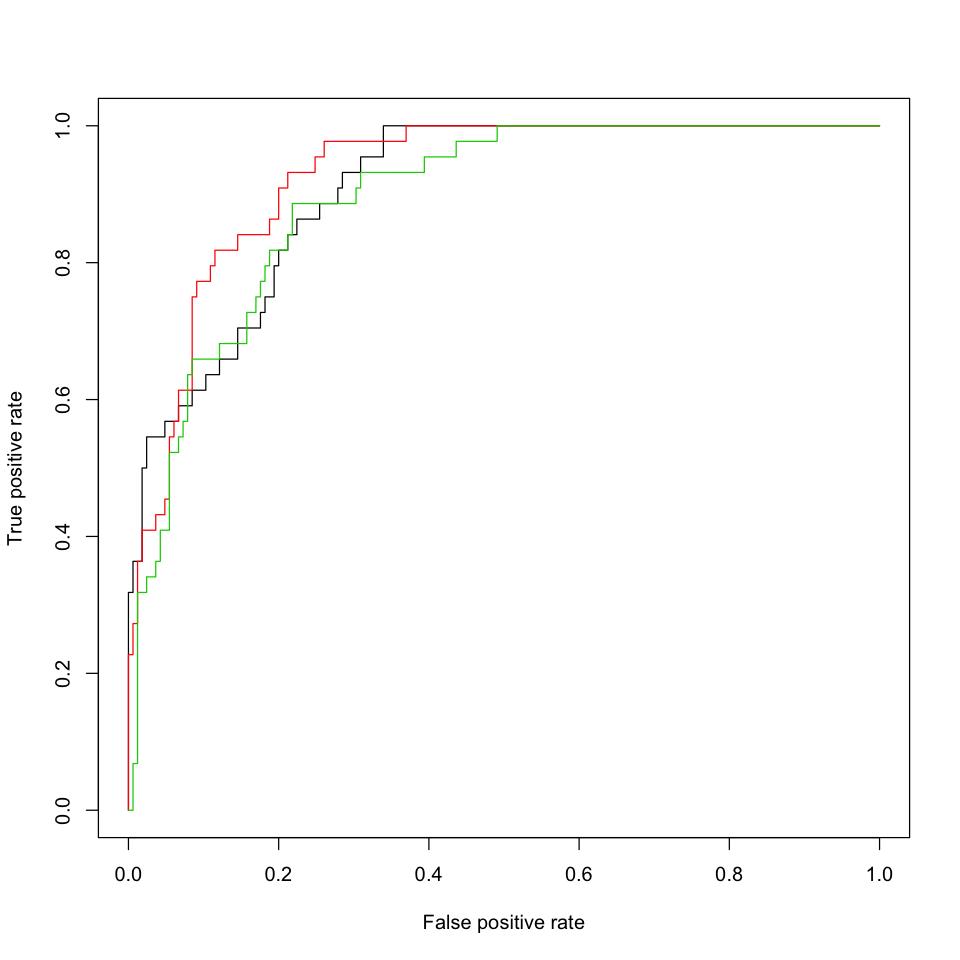

In [125]:
rocnnetr=pred.nnetr/300
prednnetr=prediction(rocnnetr,datestq$DepSeuil)
perfnnetr=performance(prednnetr,"tpr","fpr")
rocnnetq=pred.nnetq
prednnetq=prediction(rocnnetq,datestq$DepSeuil)
perfnnetq=performance(prednnetq,"tpr","fpr")
# tracer les courbes ROC en les superposant pour mieux comparer
plot(perflogit,col=1)
plot(perfnnetr,col=2,add=TRUE) 
plot(perfnnetq,col=3,add=TRUE)  

**Q** Une méthode semble-t-elle significativement meilleure?

<font color="blue">Les courbes ROC estimées sur l'échantillon test permettent de comparer les différentes méthodes testées. On remarque que le pic d'ozone est mieux prédit par le réseau de neurone modélisant la concentration par rapport à la prévision directe du dépassement. Cependant, la performance du réseau de neurone n'est pas significativement meilleure que celle des autresx modèles testés précedemment.</font>

# <font color="red">Conclusion générale

<font color="blue">
    
Le travail réalisé correspond parfaitement à un cas d'usage auquel pourrait être confronté un dataScientist. 
Les différentes parties du travail correspondent aux étapes par lesquelles on doit passer pour résoudre une problématique de datascience.
    
Le TP1 montre que lorsque l'on est confronté à une problématique, quelle qu'elle soit, la première étape est de procéder à une analyse descriptive unidimensionelle des données. Il s'agit principalement de calculer les effectifs, la fréquence, la moyenne, médiane, quartiles, variances etc. et de faire des diagrammes (de frequence ou effectifs cumulés par exemple) pour visualiser la répartitions des données.
L'objectif de cette étape est de s'approprier les données par variables afin de mieux comprendre l'objectif liée à la problématique et éventuellement anticipé un traitement des données post-application des modèles.

Le TP2 étudie empiriquement les données. Il s'agit d'analyser les corrélations entre variable. Il est important de noter que si deux variables sont très corrélées, alors c'est qu'elles apportent des informations similaires. Ainsi, garder les deux apporterait de la redondance dans l'apprentissage du modèle.
Pour analyser la corrélation entre variable, il est possible d'afficher des matrices de corrélation mais aussi d'appliquer le modèle PCA, qui réduit la dimension des variables. Ce modèle est très utile lorsqu'il y a de nombreuses variables dont la compréhension de la nature peut être complexe.
Après application de PCA, il est possible de visualiser les corrélations en terme de degrè de vecteur ou bien de visualiser la dispersion. 

    
Avant d'appliquer des modèles d'apprentissage du modèle, il est nécéssaire de découper aléatoirement le jeu de données en deux :
    
- données train pour estimer les paramètres du modèle 
- données test pour comparer les méthodes
    
Pour ce travail, plusieurs types de modèles sont testés. Pour comparer ces modèles, il faut pouvoir évaluer leur performance par une même mesure. Ici, on les compare grace à des courbes ROC. Une courbe ROC est une mesure de la performance d'un classificateur binaire, c'est-à-dire d'un système qui a pour objectif de catégoriser des éléments en deux groupes distincts sur la base d'une ou plusieurs des caractéristiques de chacun de ces éléments. Graphiquement, on représente souvent la mesure ROC sous la forme d'une courbe qui donne le taux de vrais positifs (fraction des positifs qui sont effectivement détectés) en fonction du taux de faux positifs (fraction des négatifs qui sont incorrectement détectés).
    
L'objectif est d'optimiser la compléxité des modèles en minimisant une estimation "sans biais" de l'erreur de prévision.
    
Dans le TP3,nous appliquons la regression linéaire pour comprendre les relations entre les variables.
    
Dans le TP4, est étudié la prévision par modèle Gaussien. Nous comprenons que lorsque les variables sont qualitatives, il est d'usage d'utiliser la regression linéaire pour analyser la covariance. Une fois le modèle appliqué, pour le valider, il faut vérifier les hypothèses sur les résidus. Par la suite, nous pouvons observer la distribution des résidus qui nous renseigne sur les hypothèses de linéarité et d'homoscédasticité.
Il est aussi possible d'appliquer lasso afin de diminuer le nombre de variable. 
Sur les données d'Ozone, on observe que les approches gaussienne et binomiale ne sont pas très différentes.
    
Le TP5 est consacré à l'application des arbres binaires. Nous appliquons le modèle d'arbre de regréssion pour modéliser la concentration d'ozone. Nous élaguons l'arbre par validation croisée. Nous utilisons l'entropie pour élaguer.
Pour le dépassement de seuil, nous utilisons des arbres de décision/discrimination avec l'indice de gini. Nous observons que les arbres de décisions sont moins performants sur les données d'Ozone que la regression et l'arbre binaire.
    
Dans le TP6, nous appliquons des réseaux de neurones aux données d'ozone et nous observons qu'ils ne sont pas forcément plus performants que les modèles testés auparavant.
    
    
Durant ce travail, j'ai pu observer l'importance de l'analyse des variables en amont de l'application des modèles pour comprendre certaines tendances. Aussi, j'ai appris qu'il ne fallait pas se limiter à un type de modèle pour répondre à une problématique : chaque cas d'usage est unique donc il vaut mieux tester un maximum d'approche pour créer une approche hybride répondant au mieux à nos besoins.
    
   
    
    
    

</font>